<a href="https://colab.research.google.com/github/Derrick-Majani/Tourism-Groupings/blob/main/Unsupervised_Tourim%26PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

To explore the data and identify different groups of countries based on important factors to find key locations where investments can be made to promote tourism services.


## Key Questions

- Which variables should be used for clustering?
- How many different groups/clusters of countries can be found from the data?
- How do the different clusters vary?
- How to use PCA to retain the components which explain 90% variance?
- How to perform clustering using the components obtained from PCA?


### Data Description

This dataset contains key statistical indicators of the countries. It covers sections like general information, economic indicators, social indicators, environmental & infrastructural indicators.

**Data Dictionary**
- country: country
- Region: region of the country
- Surface area (km2): Surface area in sq. km
- Population in thousands (2017): Population of the country, in thousands, as in the year 2017
- Population density (per km2, 2017): Population density per km2, as in the year 2017
- Sex ratio (m per 100 f, 2017): Number of males per 100 female, as in the year 2017
- GDP: Gross domestic product (million current US\\$): GDP of the country in million USD
- Economy: Agriculture (% of GVA): Contribution of agriculture to the economy as a percentage of Gross Value Added
- Economy: Industry (% of GVA): Contribution of the industry to the economy as a percentage of Gross Value Added
- Economy: Services and other activity (% of GVA): Contribution of services and other activities to the economy as a percentage of Gross Value Added
- International trade: Exports (million US dollar): Amount, in million USD, of international exports
- International trade: Imports (million US dollar): Amount, in million USD, of international imports
- International trade: Balance (million US dollar): Amount, in million USD, of balance between international exports and imports
- Fertility rate, total (live births per woman): Fertility rate of the country computed as the no. of live births per woman
- Infant mortality rate (per 1000 live births): Infant mortality rate of the country computed as the no. of dead infants per 1000 live births
- Health: Total expenditure (% of GDP): Total expenditure on healthcare facilities as a percentage of GDP
- Education: Government expenditure (% of GDP): Total expenditure on education as a percentage of GDP
- Mobile-cellular subscriptions (per 100 inhabitants): no. of mobile/cellular subscriptions per 100 people
- Individuals using the Internet (per 100 inhabitants): no. of individuals using the Internet per 100 people
- Threatened species (number): Number of threatened species
- CO2 emission estimates (million tons/tons per capita): CO2 emission estimates in million tons
- Energy production, primary (Petajoules): energy production in petajoules

In [60]:
# this will help in making the Python code more structured automatically (good coding practice)


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
import io
# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
# Use Local drives to upload the excel on google colab
from google.colab import files
uploaded = files.upload()

Saving country_stats.csv to country_stats.csv


In [61]:
data=pd.read_csv(io.BytesIO(uploaded['country_stats.csv']))
data.head(10)


country          Region Surface area (km2)  \
0          Afghanistan    SouthernAsia             652864   
1              Albania  SouthernEurope              28748   
2              Algeria  NorthernAfrica            2381741   
3       American Samoa       Polynesia                199   
4              Andorra  SouthernEurope                468   
5               Angola    MiddleAfrica            1246700   
6             Anguilla       Caribbean                 91   
7  Antigua and Barbuda       Caribbean                442   
8            Argentina    SouthAmerica            2780400   
9              Armenia     WesternAsia              29743   

   Population in thousands (2017)  Population density (per km2, 2017)  \
0                           35530                                54.4   
1                            2930                               106.9   
2                           41318                                17.3   
3                              56                               278.2   
4                              77                               163.8   
5                           29784                                23.9   
6                              15                               165.7   
7                             102                               231.8   
8                           44271                                16.2   
9                            2930                               102.9   

   Sex ratio (m per 100 f, 2017)  \
0                          106.3   
1                          101.9   
2                          102.0   
3                          103.6   
4                          102.3   
5                           96.2   
6                           97.6   
7                           92.3   
8                           95.9   
9                           88.8   

   GDP: Gross domestic product (million current US$)  \
0                                              20270   
1                                              11541   
2                                             164779   
3                                                -99   
4                                               2812   
5                                             117955   
6                                                320   
7                                               1356   
8                                             632343   
9                                              10529   

  Economy: Agriculture (% of GVA)  Economy: Industry (% of GVA)  \
0                            23.3                          23.3   
1                            22.4                          26.0   
2                            12.2                          37.3   
3                             -99                         -99.0   
4                             0.5                          10.8   
5                             6.8                          51.2   
6                             2.3                          15.7   
7                             1.9                          18.3   
8                               6                          27.8   
9                              19                          28.3   

   Economy: Services and other activity (% of GVA)  \
0                                             53.3   
1                                             51.7   
2                                             50.5   
3                                            -99.0   
4                                             88.6   
5                                             42.0   
6                                             82.0   
7                                             79.8   
8                                             66.2   
9                                             52.8   

  International trade: Exports (million US$)  \
0                                       1458   
1                                       1962   
2                                      29992   


In [62]:
data.shape

(229, 22)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                229 non-null    object 
 1   Region                                                 229 non-null    object 
 2   Surface area (km2)                                     229 non-null    object 
 3   Population in thousands (2017)                         229 non-null    int64  
 4   Population density (per km2, 2017)                     229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                          229 non-null    float64
 6   GDP: Gross domestic product (million current US$)      229 non-null    int64  
 7   Economy: Agriculture (% of GVA)                        229 non-null    object 
 8   Economy: Industry (% of GVA)                      

In [64]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Missing Values

In [65]:
df.isnull().sum()

country                                                  0
Region                                                   0
Surface area (km2)                                       0
Population in thousands (2017)                           0
Population density (per km2, 2017)                       0
Sex ratio (m per 100 f, 2017)                            0
GDP: Gross domestic product (million current US$)        0
Economy: Agriculture (% of GVA)                          0
Economy: Industry (% of GVA)                             0
Economy: Services and other activity (% of GVA)          0
International trade: Exports (million US$)               0
International trade: Imports (million US$)               0
International trade: Balance (million US$)               0
Fertility rate, total (live births per woman)            0
Infant mortality rate (per 1000 live births)             0
Health: Total expenditure (% of GDP)                     0
Education: Government expenditure (% of GDP)            

### Statistical Analysis

In [66]:
df.describe().T

count           mean  \
Population in thousands (2017)                      229.0   32756.794760   
Population density (per km2, 2017)                  229.0     462.824891   
Sex ratio (m per 100 f, 2017)                       229.0     100.202183   
GDP: Gross domestic product (million current US$)   229.0  321433.886463   
Economy: Industry (% of GVA)                        229.0      15.958952   
Economy: Services and other activity (% of GVA)     229.0      46.408734   
Health: Total expenditure (% of GDP)                229.0     -11.248908   
Individuals using the Internet (per 100 inhabit...  229.0     198.711790   
CO2 emission estimates (million tons/tons per c...  229.0    2464.262009   
Energy production, primary (Petajoules)             229.0      80.847162   

                                                             std   min  \
Population in thousands (2017)                      1.332751e+05   1.0   
Population density (per km2, 2017)                  2.305384e+03   0.1   
Sex ratio (m per 100 f, 2017)                       2.832784e+01 -99.0   
GDP: Gross domestic product (million current US$)   1.478690e+06 -99.0   
Economy: Industry (% of GVA)                        3.868463e+01 -99.0   
Economy: Services and other activity (% of GVA)     4.860373e+01 -99.0   
Health: Total expenditure (% of GDP)                3.992494e+01 -99.0   
Individuals using the Internet (per 100 inhabit...  2.964531e+02 -99.0   
CO2 emission estimates (million tons/tons per c...  9.912892e+03 -99.0   
Energy production, primary (Petajoules)             1.218083e+02 -99.0   

                                                       25%      50%       75%  \
Population in thousands (2017)                       431.0   5448.0   19193.0   
Population density (per km2, 2017)                    35.9     88.1     222.8   
Sex ratio (m per 100 f, 2017)                         96.4     99.0     101.7   
GDP: Gross domestic product (million current US$)   2078.0  16251.0  117955.0   
Economy: Industry (% of GVA)                          15.4     25.5      32.8   
Economy: Services and other activity (% of GVA)       47.3     59.5      70.7   
Health: Total expenditure (% of GDP)                   3.4      5.6       7.8   
Individuals using the Internet (per 100 inhabit...    55.0     97.0     196.0   
CO2 emission estimates (million tons/tons per c...     2.0    108.0     961.0   
Energy production, primary (Petajoules)               19.0     47.0     103.0   

                                                           max  
Population in thousands (2017)                       1409517.0  
Population density (per km2, 2017)                     25969.8  
Sex ratio (m per 100 f, 2017)                            301.2  
GDP: Gross domestic product (million current US$)   18036648.0  
Economy: Industry (% of GVA)                              79.9  
Economy: Services and other activity (% of GVA)           94.0  
Health: Total expenditure (% of GDP)                      17.1  
Individuals using the Internet (per 100 inhabit...      2358.0  
CO2 emission estimates (million tons/tons per c...    101394.0  
Energy production, primary (Petajoules)                  952.0

In [67]:
# Print categorical summary
print('Categorical Summary:')
df.describe(include=['object']).T

Categorical Summary:


count unique          top  \
country                                              229    229  Afghanistan   
Region                                               229     22    Caribbean   
Surface area (km2)                                   229    225          -99   
Economy: Agriculture (% of GVA)                      229    139          -99   
International trade: Exports (million US$)           229    206          -99   
International trade: Imports (million US$)           229    210          -99   
International trade: Balance (million US$)           229    211          -99   
Fertility rate, total (live births per woman)        229     51          1.5   
Infant mortality rate (per 1000 live births)         229    157          -99   
Education: Government expenditure (% of GDP)         229     63          -99   
Mobile-cellular subscriptions (per 100 inhabita...   229    196          -99   
Threatened species (number)                          229    194          -99   

                                                   freq  
country                                               1  
Region                                               25  
Surface area (km2)                                    3  
Economy: Agriculture (% of GVA)                      23  
International trade: Exports (million US$)           18  
International trade: Imports (million US$)           18  
International trade: Balance (million US$)           18  
Fertility rate, total (live births per woman)        16  
Infant mortality rate (per 1000 live births)         23  
Education: Government expenditure (% of GDP)         45  
Mobile-cellular subscriptions (per 100 inhabita...   13  
Threatened species (number)                           8

In [68]:
df.sample(n=10)

country             Region Surface area (km2)  \
122                          Malaysia  South-easternAsia             330323   
34                         Cabo Verde      WesternAfrica               4033   
39           Central African Republic       MiddleAfrica             622984   
173  Saint Vincent and the Grenadines          Caribbean                389   
106                        Kazakhstan        CentralAsia            2724902   
101                            Israel        WesternAsia              22072   
140                           Namibia     SouthernAfrica             824116   
206               Trinidad and Tobago          Caribbean               5127   
121                            Malawi      EasternAfrica             118484   
214              United Arab Emirates        WesternAsia              83600   

     Population in thousands (2017)  Population density (per km2, 2017)  \
122                           31624                                96.3   
34                              546                               135.6   
39                             4659                                 7.5   
173                             110                               281.8   
106                           18204                                 6.7   
101                            8322                               384.5   
140                            2534                                 3.1   
206                            1369                               266.9   
121                           18622                               197.5   
214                            9400                               112.4   

     Sex ratio (m per 100 f, 2017)  \
122                          106.7   
34                            99.3   
39                            97.3   
173                          101.7   
106                           93.9   
101                           98.7   
140                           94.7   
206                           97.1   
121                           98.2   
214                          262.4   

     GDP: Gross domestic product (million current US$)  \
122                                             296284   
34                                                1603   
39                                                1633   
173                                                738   
106                                             181754   
101                                             299413   
140                                              11491   
206                                              25927   
121                                               6420   
214                                             370296   

    Economy: Agriculture (% of GVA)  Economy: Industry (% of GVA)  \
122                             8.6                          39.6   
34                              9.5                          19.8   
39                             34.9                          24.8   
173                             7.5                          17.2   
106                               5                          32.5   
101                             1.3                          21.2   
140                             6.6                          30.6   
206                             0.5                          42.5   
121                            26.1                          16.6   
214                             0.7                          44.9   

     Economy: Services and other activity (% of GVA)  \
122                                             51.8   
34                                              70.7   
39                                              40.4   
173                                             75.3   
106                                             62.5   
101                                             77.5   
140                                             62.8   
206                                             57.0   
121         

### Feature Engineering

In [69]:
import pandas as pd

# List of columns to modify
columns_to_modify = ['country', 'Region', 'Surface area (km2)', 'Economy: Agriculture (% of GVA)',
                    'International trade: Exports (million US$)', 'International trade: Imports (million US$)',
                    'International trade: Balance (million US$)', 'Fertility rate, total (live births per woman)',
                    'Infant mortality rate (per 1000 live births)', 'Education: Government expenditure (% of GDP)',
                    'Mobile-cellular subscriptions (per 100 inhabitants)', 'Threatened species (number)']

# Clean column names
cols_init = df.columns.tolist()
cols_new = [item.split("(")[0].rstrip() if "(" in item else item for item in cols_init]
df.columns = cols_new

# Iterate through the specified columns
for column in columns_to_modify:
    if column in df.columns:
        df[column] = df[column].str.replace(r'\(.*\)', '').str.strip()

# Print the updated DataFrame
df


<ipython-input-69-ba20fdd718f9>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(r'\(.*\)', '').str.strip()


country          Region Surface area  \
0                  Afghanistan    SouthernAsia       652864   
1                      Albania  SouthernEurope        28748   
2                      Algeria  NorthernAfrica      2381741   
3               American Samoa       Polynesia          199   
4                      Andorra  SouthernEurope          468   
..                         ...             ...          ...   
224  Wallis and Futuna Islands       Polynesia          142   
225             Western Sahara  NorthernAfrica       266000   
226                      Yemen     WesternAsia       527968   
227                     Zambia   EasternAfrica       752612   
228                   Zimbabwe   EasternAfrica       390757   

     Population in thousands  Population density  Sex ratio  \
0                      35530                54.4      106.3   
1                       2930               106.9      101.9   
2                      41318                17.3      102.0   
3                         56               278.2      103.6   
4                         77               163.8      102.3   
..                       ...                 ...        ...   
224                       12                84.1       93.4   
225                      553                 2.1      110.1   
226                    28250                53.5      102.1   
227                    17094                23.0       98.5   
228                    16530                42.7       95.0   

     GDP: Gross domestic product Economy: Agriculture  Economy: Industry  \
0                          20270                 23.3               23.3   
1                          11541                 22.4               26.0   
2                         164779                 12.2               37.3   
3                            -99                  -99              -99.0   
4                           2812                  0.5               10.8   
..                           ...                  ...                ...   
224                          -99                  -99              -99.0   
225                          -99                  -99              -99.0   
226                        29688                 14.7               36.9   
227                        21255                  8.2               32.3   
228                        13893                   13               30.5   

     Economy: Services and other activity International trade: Exports  \
0                                    53.3                         1458   
1                                    51.7                         1962   
2                                    50.5                        29992   
3                                   -99.0                          -99   
4                                    88.6                          100   
..                                    ...                          ...   
224                                 -99.0                            1   
225                                 -99.0                          -99   
226                                  48.4                          570   
227                                  59.5                         6505   
228                                  56.5                         2832   

    International trade: Imports International trade: Balance  \
0                           3568                        -2110   
1                           4669                        -2707   
2                          47091                       -17099   
3                            -99                          -99   
4                           1355                        -1255   
..                           ...                          ...   
224                           53                          -51   
225                          -99                          -99   
226                         6861                        -6291   
227                         7442                         

In [70]:
# fixing the names of columns as there are dots, spaces  in columns names
df.columns = [col.replace(" ", "_") for col in df.columns]

In [71]:
temp = pd.DataFrame(df.Surface_area.str.isdigit())  # if the string is made of digits store True else False  in the hp column
# in temp dataframe

temp[temp['Surface_area'] == False]

Surface_area
25          False
91          False
130         False
193         False

In [72]:
import pandas as pd
import numpy as np

# Load your DataFrame 'df' here

# Define epsilon value
epsilon = 1e-9

# Loop through columns and apply the required replacements
for item in df.columns:
    df[item] = df[item].apply(lambda x: np.nan if x in [-99, "-99"] else x)
    df[item] = df[item].apply(lambda x: np.nan if x == "..." else x)
    df[item] = df[item].apply(lambda x: epsilon if x == "~0" else x)

# Print the updated DataFrame
df


country          Region Surface_area  \
0                  Afghanistan    SouthernAsia       652864   
1                      Albania  SouthernEurope        28748   
2                      Algeria  NorthernAfrica      2381741   
3               American Samoa       Polynesia          199   
4                      Andorra  SouthernEurope          468   
..                         ...             ...          ...   
224  Wallis and Futuna Islands       Polynesia          142   
225             Western Sahara  NorthernAfrica       266000   
226                      Yemen     WesternAsia       527968   
227                     Zambia   EasternAfrica       752612   
228                   Zimbabwe   EasternAfrica       390757   

     Population_in_thousands  Population_density  Sex_ratio  \
0                      35530                54.4      106.3   
1                       2930               106.9      101.9   
2                      41318                17.3      102.0   
3                         56               278.2      103.6   
4                         77               163.8      102.3   
..                       ...                 ...        ...   
224                       12                84.1       93.4   
225                      553                 2.1      110.1   
226                    28250                53.5      102.1   
227                    17094                23.0       98.5   
228                    16530                42.7       95.0   

     GDP:_Gross_domestic_product Economy:_Agriculture  Economy:_Industry  \
0                        20270.0                 23.3               23.3   
1                        11541.0                 22.4               26.0   
2                       164779.0                 12.2               37.3   
3                            NaN                  NaN                NaN   
4                         2812.0                  0.5               10.8   
..                           ...                  ...                ...   
224                          NaN                  NaN                NaN   
225                          NaN                  NaN                NaN   
226                      29688.0                 14.7               36.9   
227                      21255.0                  8.2               32.3   
228                      13893.0                   13               30.5   

     Economy:_Services_and_other_activity International_trade:_Exports  \
0                                    53.3                         1458   
1                                    51.7                         1962   
2                                    50.5                        29992   
3                                     NaN                          NaN   
4                                    88.6                          100   
..                                    ...                          ...   
224                                   NaN                            1   
225                                   NaN                          NaN   
226                                  48.4                          570   
227                                  59.5                         6505   
228                                  56.5                         2832   

    International_trade:_Imports International_trade:_Balance  \
0                           3568                        -2110   
1                           4669                        -2707   
2                          47091                       -17099   
3                            NaN                          NaN   
4                           1355                        -1255   
..                           ...                          ...   
224                           53                          -51   
225                          NaN                          NaN   
226                         6861                        -6291   
227                         7442                         

In [73]:
# isdigit()? on 'horsepower'
hpIsDigit = pd.DataFrame(df['Surface_area'].isnull())  # if the string is made of digits store True else False

#print isDigit = False!
df[hpIsDigit['Surface_area'] == True]   # from temp take only those rows where hp has false

country          Region Surface_area  \
25   Bonaire, Sint Eustatius and Saba       Caribbean          NaN   
130                           Mayotte   EasternAfrica          NaN   
193                             Sudan  NorthernAfrica          NaN   

     Population_in_thousands  Population_density  Sex_ratio  \
25                        25                77.4        NaN   
130                      253               674.8       96.7   
193                    40533                23.0       99.9   

     GDP:_Gross_domestic_product Economy:_Agriculture  Economy:_Industry  \
25                           NaN                  NaN                NaN   
130                          NaN                  NaN                NaN   
193                      79546.0                 32.4               20.1   

     Economy:_Services_and_other_activity International_trade:_Exports  \
25                                    NaN                          NaN   
130                                   NaN                          NaN   
193                                  47.6                         1797   

    International_trade:_Imports International_trade:_Balance  \
25                           NaN                          NaN   
130                          NaN                          NaN   
193                         7658                        -5861   

    Fertility_rate,_total Infant_mortality_rate  Health:_Total_expenditure  \
25                    NaN                   NaN                        NaN   
130                   4.1                   4.2                        NaN   
193                   4.8                  48.7                        8.4   

    Education:_Government_expenditure Mobile-cellular_subscriptions  \
25                                NaN                           NaN   
130                               NaN                           NaN   
193                               NaN                          70.5   

     Individuals_using_the_Internet Threatened_species  \
25                             56.0                NaN   
130                            88.0               16.1   
193                           133.0                NaN   

     CO2_emission_estimates  Energy_production,_primary  
25                      0.0                       208.0  
130                     0.0                        19.0  
193                   682.0                        16.0

### Missing Values

In [74]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

Total   Percent
Education:_Government_expenditure        81  0.353712
Health:_Total_expenditure                39  0.170306
Infant_mortality_rate                    25  0.109170
Economy:_Agriculture                     23  0.100437
GDP:_Gross_domestic_product              21  0.091703
Economy:_Industry                        21  0.091703
Economy:_Services_and_other_activity     21  0.091703
CO2_emission_estimates                   20  0.087336
Mobile-cellular_subscriptions            20  0.087336
International_trade:_Imports             19  0.082969
International_trade:_Exports             19  0.082969
International_trade:_Balance             19  0.082969
Fertility_rate,_total                    17  0.074236
Energy_production,_primary               10  0.043668
Threatened_species                        8  0.034934
Surface_area                              3  0.013100
Sex_ratio                                 2  0.008734
Individuals_using_the_Internet            1  0.004367
Region                                    0  0.000000
Population_density                        0  0.000000
Population_in_thousands                   0  0.000000
country                                   0  0.000000

<Axes: >

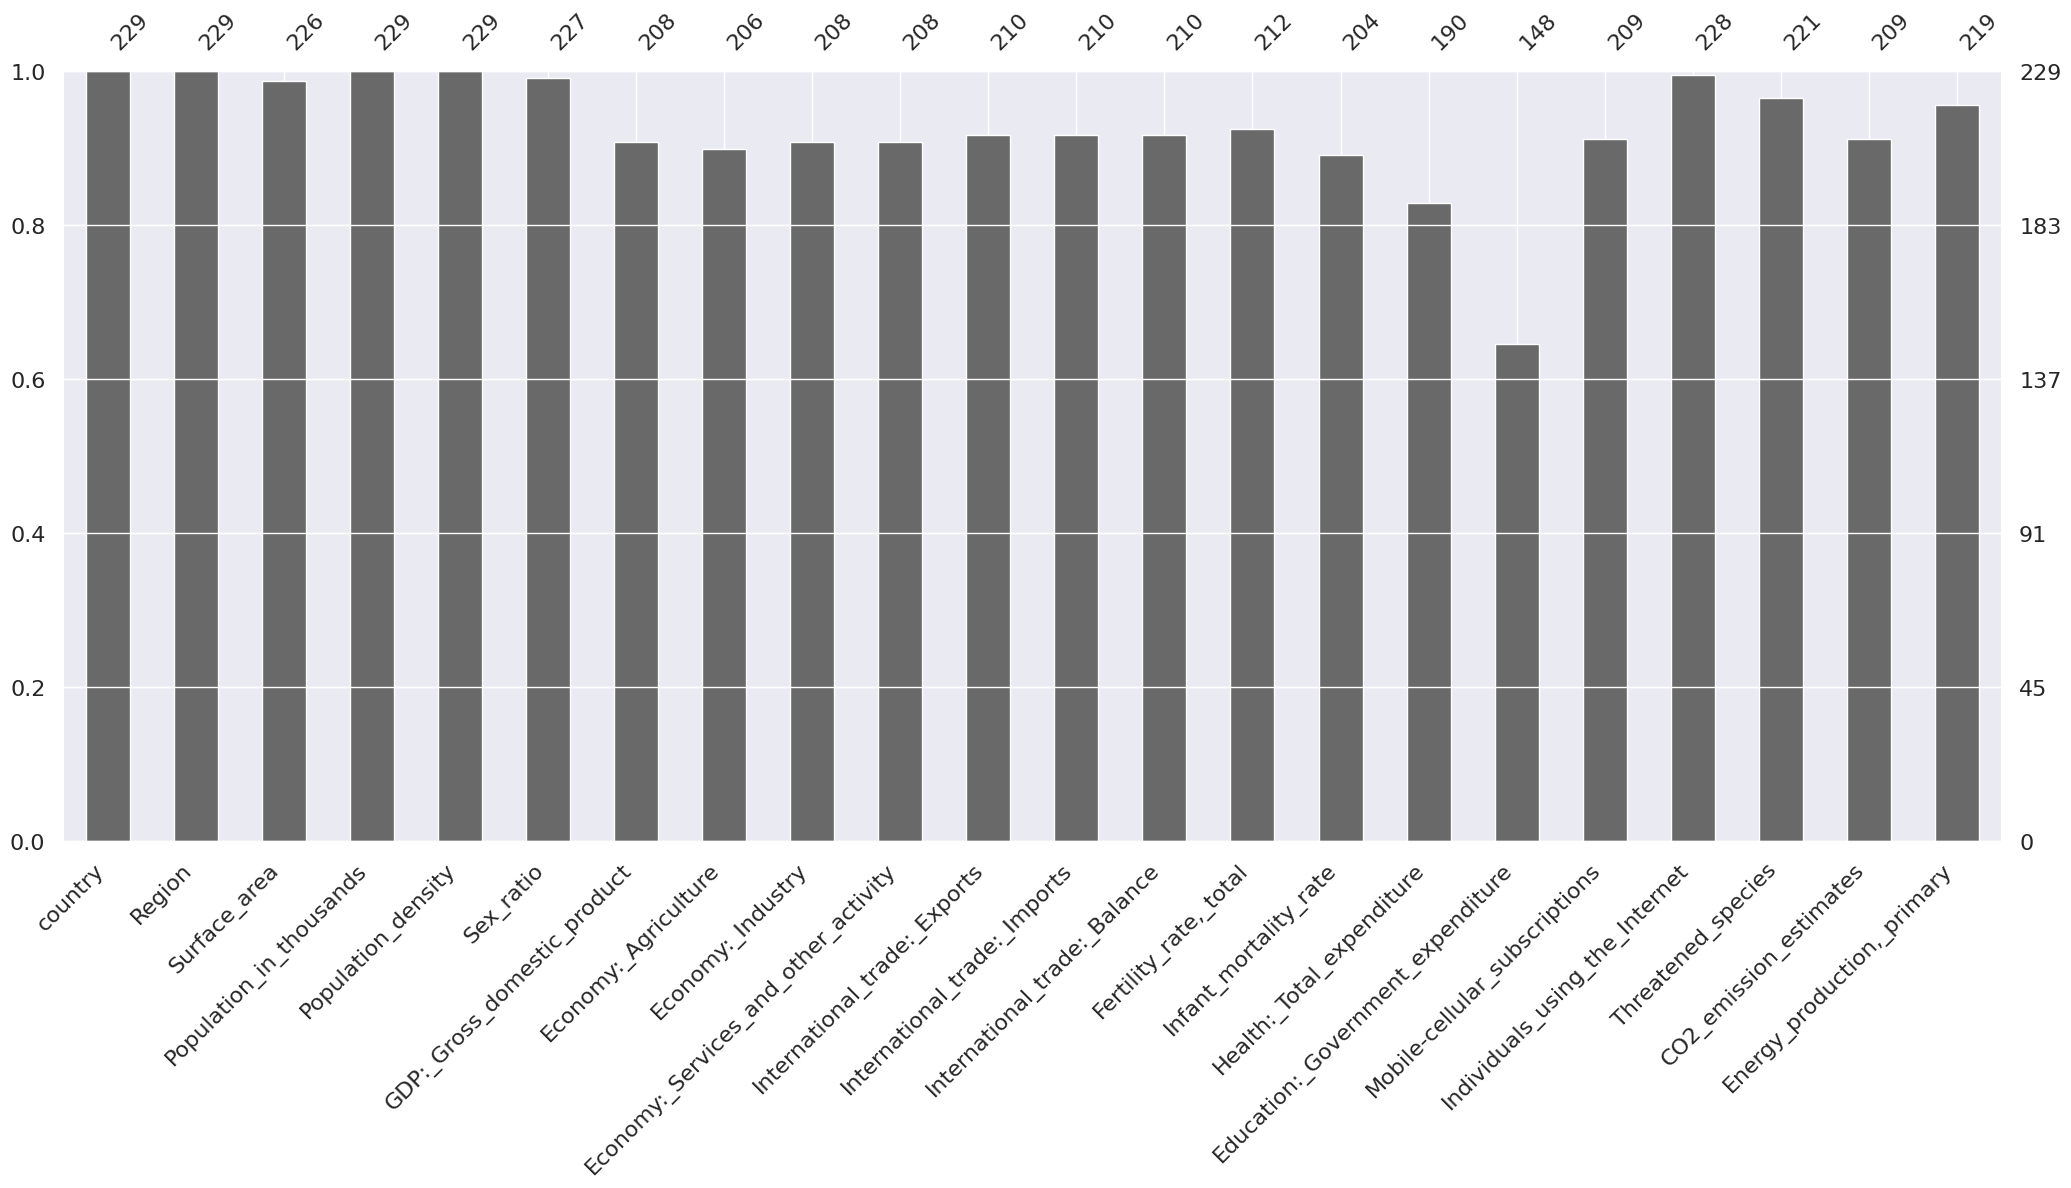

In [75]:
# Program to visualize missing values in dataset

# Importing the libraries
import pandas as pd
import missingno as msno

# Visualize the number of missing
# values as a bar chart
msno.bar(df)


In [76]:
columns_to_convert = [
    "Surface_area",
    "Economy:_Agriculture",
    "International_trade:_Exports",
    "International_trade:_Imports",
    "International_trade:_Balance",
    "Fertility_rate,_total",
    "Infant_mortality_rate",
    "Education:_Government_expenditure",
    "Mobile-cellular_subscriptions",
    "Threatened_species"
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors="coerce")

# Print the updated DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               229 non-null    object 
 1   Region                                229 non-null    object 
 2   Surface_area                          226 non-null    float64
 3   Population_in_thousands               229 non-null    int64  
 4   Population_density                    229 non-null    float64
 5   Sex_ratio                             227 non-null    float64
 6   GDP:_Gross_domestic_product           208 non-null    float64
 7   Economy:_Agriculture                  205 non-null    float64
 8   Economy:_Industry                     208 non-null    float64
 9   Economy:_Services_and_other_activity  208 non-null    float64
 10  International_trade:_Exports          210 non-null    float64
 11  International_trade

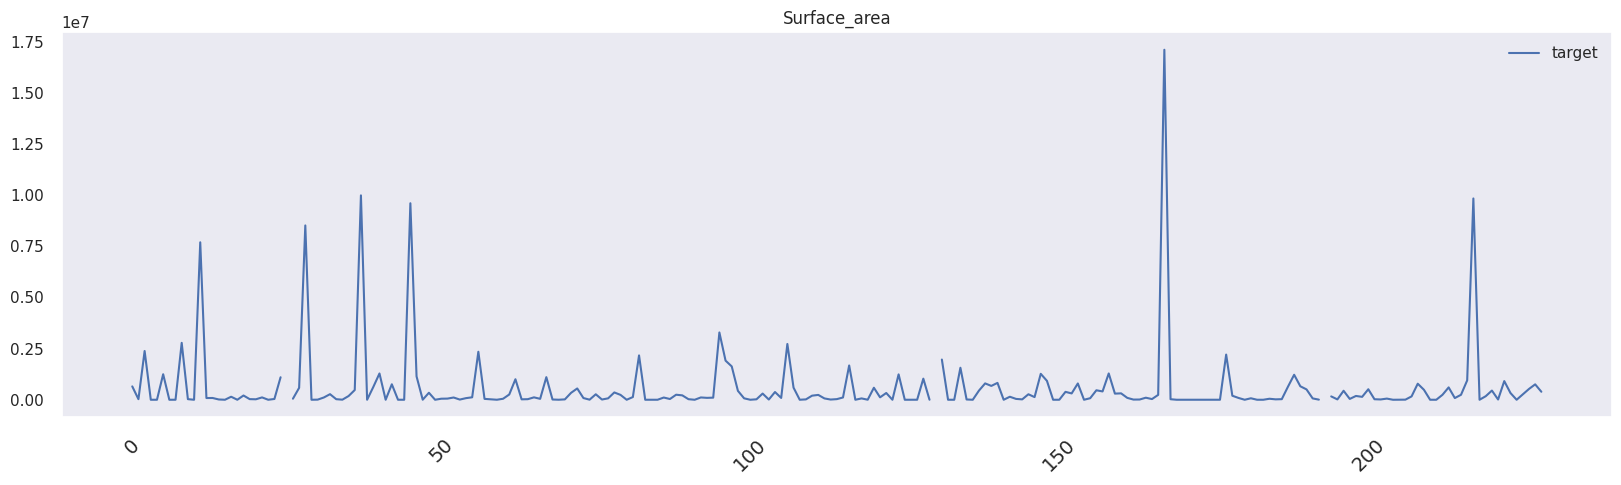

In [77]:
# Let's visualize vehicles data
# How does missing data show up?
plt.figure(figsize=(20,5))
plt.title('Surface_area')
plt.plot(df['Surface_area'], label='target')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

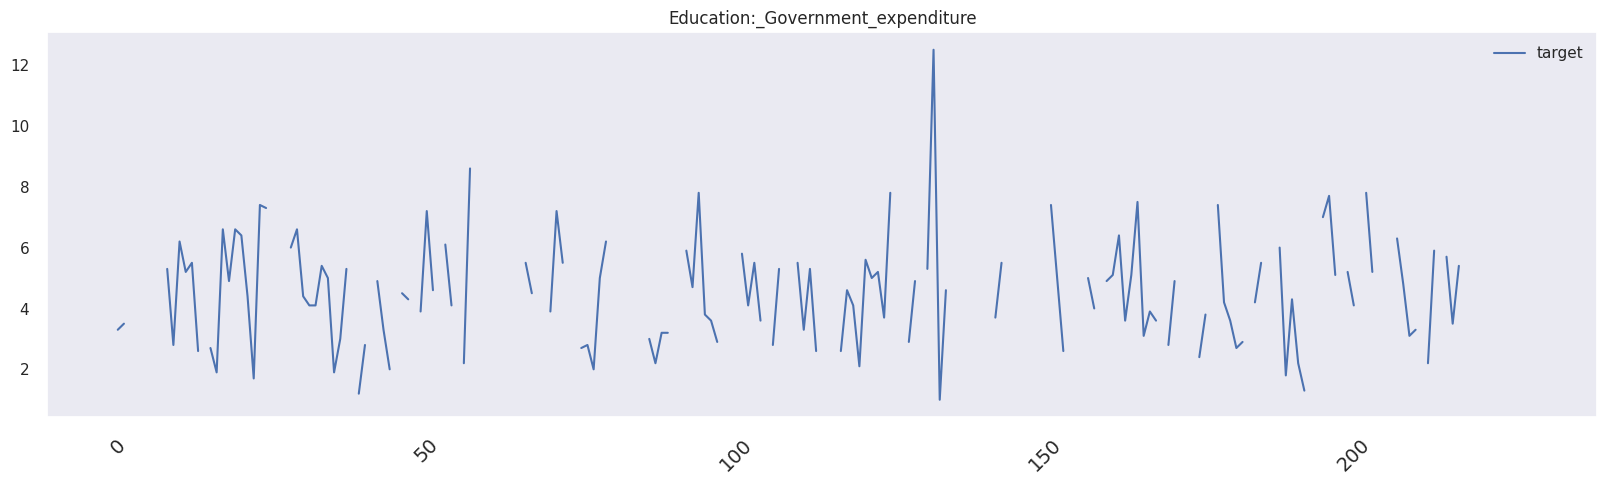

In [78]:
# Let's visualize vehicles data
# How does missing data show up?
plt.figure(figsize=(20,5))
plt.title('Education:_Government_expenditure')
plt.plot(df['Education:_Government_expenditure'], label='target')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

In [79]:
df.loc[(df['Education:_Government_expenditure'].isnull()) |
              (df['Health:_Total_expenditure'].isnull()) |
       (df['Infant_mortality_rate'].isnull()) |
       (df['Economy:_Agriculture'].isnull()) |
       (df['GDP:_Gross_domestic_product'].isnull()) |
       (df['Economy:_Industry'].isnull()) |
       (df['Economy:_Services_and_other_activity'].isnull()) |
        (df['CO2_emission_estimates'].isnull()) |
         (df['Mobile-cellular_subscriptions'].isnull()) |
         (df['International_trade:_Imports'].isnull()) |
         (df['International_trade:_Exports'].isnull()) |
         (df['International_trade:_Balance'].isnull()) |
         (df['Fertility_rate,_total'].isnull()) |
              (df['Energy_production,_primary'].isnull()) |
       (df['Surface_area'].isnull()) |
(df['Sex_ratio'].isnull()) |
              (df['Individuals_using_the_Internet'].isnull())]



country             Region  \
2                                      Algeria     NorthernAfrica   
3                               American Samoa          Polynesia   
4                                      Andorra     SouthernEurope   
5                                       Angola       MiddleAfrica   
6                                     Anguilla          Caribbean   
7                          Antigua and Barbuda          Caribbean   
10                                       Aruba          Caribbean   
14                                     Bahamas          Caribbean   
22                                     Bermuda    NorthernAmerica   
25            Bonaire, Sint Eustatius and Saba          Caribbean   
26                      Bosnia and Herzegovina     SouthernEurope   
27                                    Botswana     SouthernAfrica   
29                      British Virgin Islands          Caribbean   
38                              Cayman Islands          Caribbean   
41                             Channel Islands     NorthernEurope   
43                        China, Hong Kong SAR        EasternAsia   
44                            China, Macao SAR        EasternAsia   
45                                       China        EasternAsia   
48                                       Congo       MiddleAfrica   
49                                Cook Islands          Polynesia   
52                                        Cuba          Caribbean   
55       Democratic People's Republic of Korea        EasternAsia   
58                                    Djibouti      EasternAfrica   
59                                    Dominica          Caribbean   
60                          Dominican Republic          Caribbean   
62                                       Egypt     NorthernAfrica   
64                           Equatorial Guinea       MiddleAfrica   
65                                     Eritrea      EasternAfrica   
68                            Falkland Islands       SouthAmerica   
69                               Faroe Islands     NorthernEurope   
73                               French Guiana       SouthAmerica   
74                            French Polynesia          Polynesia   
80                                   Gibraltar     SouthernEurope   
81                                      Greece     SouthernEurope   
82                                   Greenland    NorthernAmerica   
83                                     Grenada          Caribbean   
84                                  Guadeloupe          Caribbean   
85                                        Guam         Micronesia   
90                                       Haiti          Caribbean   
91                                    Holy See     SouthernEurope   
98                                        Iraq        WesternAsia   
100                                Isle of Man     NorthernEurope   
105                                     Jordan        WesternAsia   
108                                   Kiribati         Micronesia   
109                                     Kuwait        WesternAsia   
114                                    Lesotho     SouthernAfrica   
116                                      Libya     NorthernAfrica   
117                              Liechtenstein      WesternEurope   
126                           Marshall Islands         Micronesia   
127                                 Martinique          Caribbean   
130                                    Mayotte      EasternAfrica   
133                                     Monaco      WesternEurope   
135                                 Montenegro     SouthernEurope   
136                                 Montserrat          Caribbean   
137                                    Morocco     NorthernAfrica   
139                                    Myanmar  South-easternAsia   
140                                    Namibia     SouthernAfrica   
141                                  

In [80]:
df.describe().T

count           mean           std  \
Surface_area                          226.0  593210.044248  1.796021e+06   
Population_in_thousands               229.0   32756.794760  1.332751e+05   
Population_density                    229.0     462.824891  2.305384e+03   
Sex_ratio                             227.0     101.957269  2.133800e+01   
GDP:_Gross_domestic_product           208.0  353896.341346  1.548160e+06   
Economy:_Agriculture                  205.0      11.537561  1.210343e+01   
Economy:_Industry                     208.0      27.565385  1.312442e+01   
Economy:_Services_and_other_activity  208.0      61.089423  1.550489e+01   
International_trade:_Exports          210.0   74043.061905  2.237342e+05   
International_trade:_Imports          210.0   74726.971429  2.269185e+05   
International_trade:_Balance          210.0    -683.861905  7.318817e+04   
Fertility_rate,_total                 212.0       2.818396  1.391338e+00   
Infant_mortality_rate                 204.0      25.159804  2.307216e+01   
Health:_Total_expenditure             190.0       6.763158  2.798017e+00   
Education:_Government_expenditure     148.0       4.570946  1.781128e+00   
Mobile-cellular_subscriptions         209.0     107.360287  4.306386e+01   
Individuals_using_the_Internet        228.0     200.017544  2.964446e+02   
Threatened_species                    219.0      32.349772  2.437047e+01   
CO2_emission_estimates                209.0    2709.550239  1.034513e+04   
Energy_production,_primary            219.0      89.059361  1.181795e+02   

                                               min       25%       50%  \
Surface_area                          1.000000e-09  4306.500  83735.50   
Population_in_thousands               1.000000e+00   431.000   5448.00   
Population_density                    1.000000e-01    35.900     88.10   
Sex_ratio                             8.350000e+01    96.600     99.00   
GDP:_Gross_domestic_product           3.300000e+01  4987.000  23871.00   
Economy:_Agriculture                  1.000000e-01     2.400      7.30   
Economy:_Industry                     4.000000e+00    19.075     26.45   
Economy:_Services_and_other_activity  1.490000e+01    51.000     61.30   
International_trade:_Exports          1.000000e-09   642.750   3893.00   
International_trade:_Imports          1.000000e+00  1658.750   6809.00   
International_trade:_Balance         -7.964940e+05 -3501.250   -984.00   
Fertility_rate,_total                 1.200000e+00     1.800      2.30   
Infant_mortality_rate                 1.600000e+00     6.800     16.25   
Health:_Total_expenditure             1.500000e+00     4.825      6.35   
Education:_Government_expenditure     1.000000e+00     3.200      4.55   
Mobile-cellular_subscriptions         7.000000e+00    79.400    108.20   
Individuals_using_the_Internet        1.000000e+00    55.750     97.50   
Threatened_species                    0.000000e+00    10.950     32.70   
CO2_emission_estimates                0.000000e+00     8.000    143.00   
Energy_production,_primary            2.000000e+00    20.000     51.00   

                                             75%         max  
Surface_area                          437693.500  17098246.0  
Population_in_thousands                19193.000   1409517.0  
Population_density                       222.800     25969.8  
Sex_ratio                                101.700       301.2  
GDP:_Gross_domestic_product           174551.750  18036648.0  
Economy:_Agriculture                      17.600        70.8  
Economy:_Industry                         33.325        79.9  
Economy:_Services_and_other_activity      72.100        94.0  
International_trade:_Exports           33136.000   2118981.0  
International_trade:_Imports           38521.250   2249661.0  
International_trade:_Balance              49.250    530285.0  
Fertility_rate,_total                      3.625         7.4  
Infant_mortality_rate                     40.925        94.4  
Heal

In [81]:
# Print categorical summary
print('Categorical Summary:')
df.describe(include=['object']).T

Categorical Summary:


count unique          top freq
country   229    229  Afghanistan    1
Region    229     22    Caribbean   25

In [82]:
df.head()

country          Region  Surface_area  Population_in_thousands  \
0     Afghanistan    SouthernAsia      652864.0                    35530   
1         Albania  SouthernEurope       28748.0                     2930   
2         Algeria  NorthernAfrica     2381741.0                    41318   
3  American Samoa       Polynesia         199.0                       56   
4         Andorra  SouthernEurope         468.0                       77   

   Population_density  Sex_ratio  GDP:_Gross_domestic_product  \
0                54.4      106.3                      20270.0   
1               106.9      101.9                      11541.0   
2                17.3      102.0                     164779.0   
3               278.2      103.6                          NaN   
4               163.8      102.3                       2812.0   

   Economy:_Agriculture  Economy:_Industry  \
0                  23.3               23.3   
1                  22.4               26.0   
2                  12.2               37.3   
3                   NaN                NaN   
4                   0.5               10.8   

   Economy:_Services_and_other_activity  International_trade:_Exports  \
0                                  53.3                        1458.0   
1                                  51.7                        1962.0   
2                                  50.5                       29992.0   
3                                   NaN                           NaN   
4                                  88.6                         100.0   

   International_trade:_Imports  International_trade:_Balance  \
0                        3568.0                       -2110.0   
1                        4669.0                       -2707.0   
2                       47091.0                      -17099.0   
3                           NaN                           NaN   
4                        1355.0                       -1255.0   

   Fertility_rate,_total  Infant_mortality_rate  Health:_Total_expenditure  \
0                    5.3                   68.6                        8.2   
1                    1.7                   14.6                        5.9   
2                    3.0                   27.7                        7.2   
3                    2.6                    9.6                        NaN   
4                    1.2                    NaN                        8.1   

   Education:_Government_expenditure  Mobile-cellular_subscriptions  \
0                                3.3                           61.6   
1                                3.5                          106.4   
2                                NaN                          113.0   
3                                NaN                            NaN   
4                                3.3                           88.1   

   Individuals_using_the_Internet  Threatened_species  CO2_emission_estimates  \
0                            42.0                 2.1                    63.0   
1                           130.0                28.2                    84.0   
2                           135.0                 0.8                  5900.0   
3                            92.0                87.9                     NaN   
4                            13.0                34.0                     1.0   

   Energy_production,_primary  
0                         5.0  
1                        36.0  
2                        55.0  
3                         NaN  
4                       119.0

### Unique Values

In [83]:
df.nunique()

country                                 229
Region                                   22
Surface_area                            224
Population_in_thousands                 218
Population_density                      219
Sex_ratio                               128
GDP:_Gross_domestic_product             208
Economy:_Agriculture                    137
Economy:_Industry                       169
Economy:_Services_and_other_activity    172
International_trade:_Exports            204
International_trade:_Imports            208
International_trade:_Balance            209
Fertility_rate,_total                    49
Infant_mortality_rate                   155
Health:_Total_expenditure                89
Education:_Government_expenditure        61
Mobile-cellular_subscriptions           194
Individuals_using_the_Internet          171
Threatened_species                      192
CO2_emission_estimates                  154
Energy_production,_primary              120
dtype: int64

## Chi Square

In [84]:
from scipy.stats import chi2_contingency
# Select the categorical columns to test
cat_cols = ['country', 'Region']

# Create an empty dataframe for results
results_df = pd.DataFrame(columns=['Column 1', 'Column 2', 'Chi-Square', 'P-Value'])

# Loop through each column pair and perform chi-square test
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols[i+1:]):
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)

# Print the results
results_df

<ipython-input-84-6bcc6c822733>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)


Column 1 Column 2  Chi-Square   P-Value
0  country   Region      4809.0  0.412509

### Correlation Analysis

<ipython-input-85-b11ccfa4ae47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = df.corr().round(4)


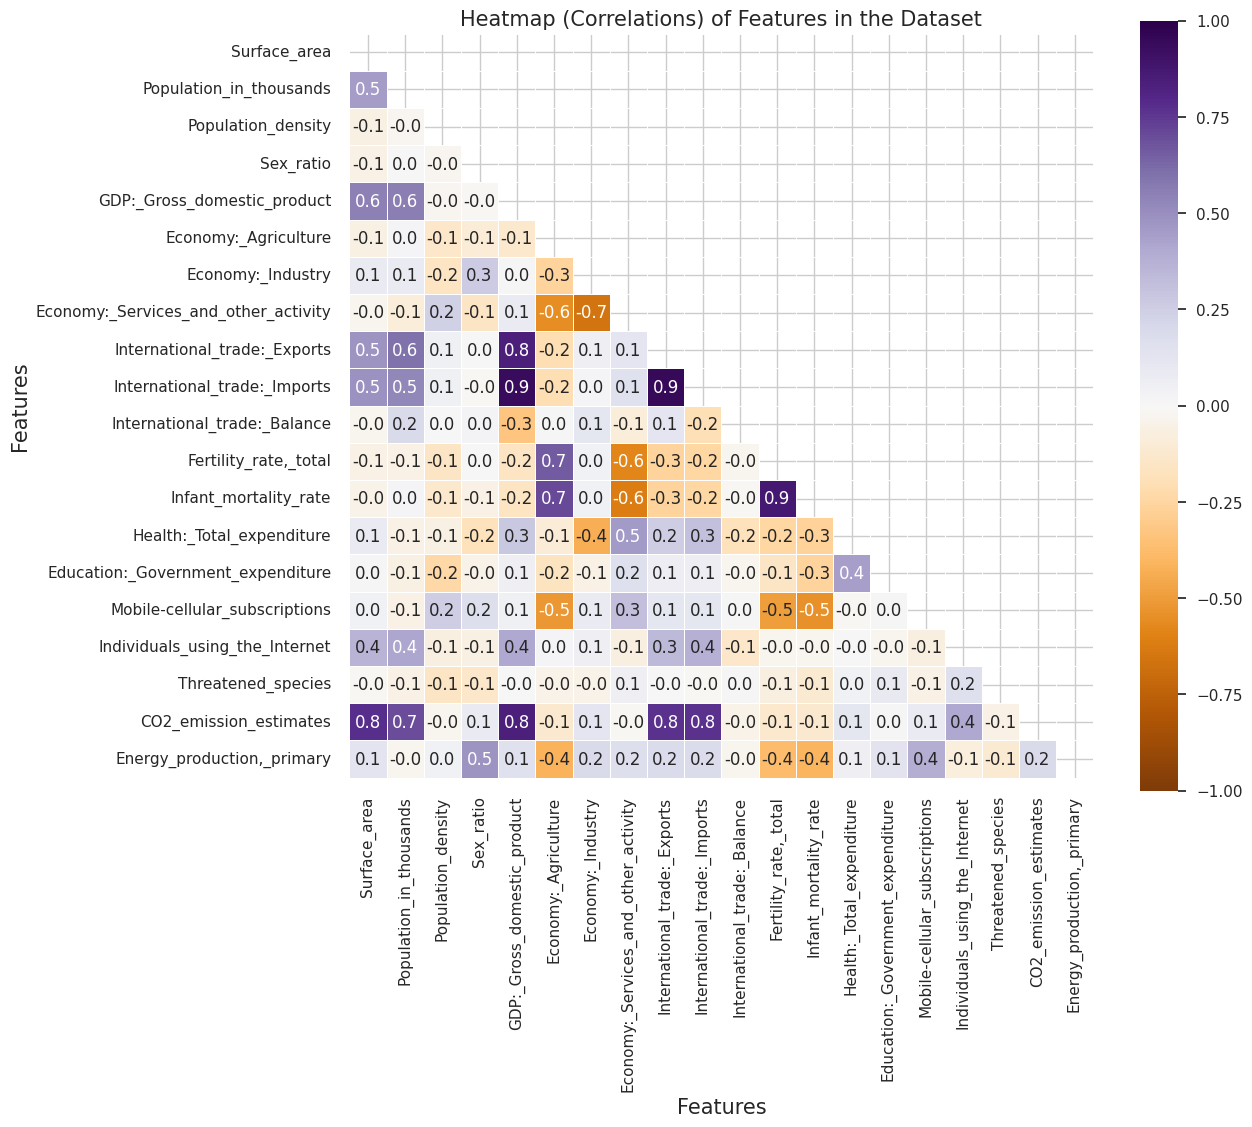

In [85]:
dataset_corr = df.corr().round(4)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix. Only bottom left corner valued.
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn.
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.1f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()

### Univariate Analysis

In [86]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="white"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has

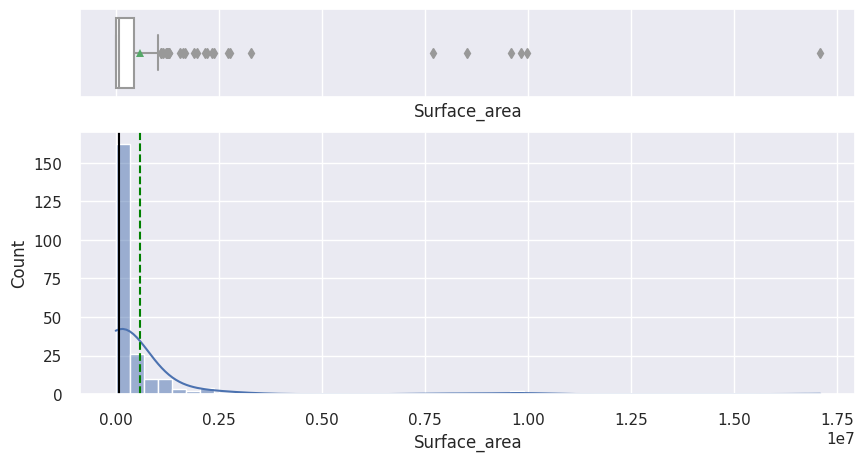

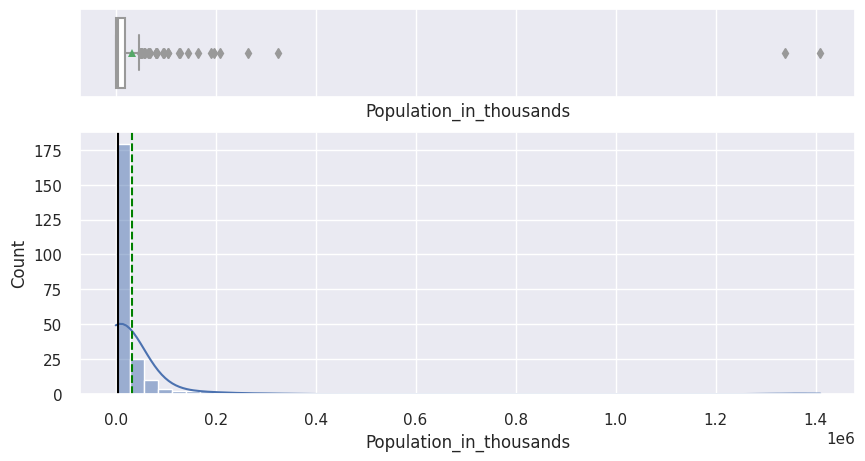

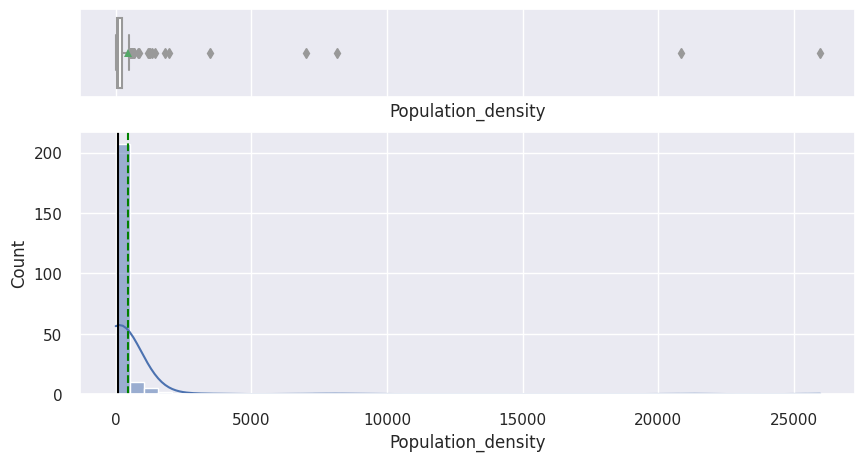

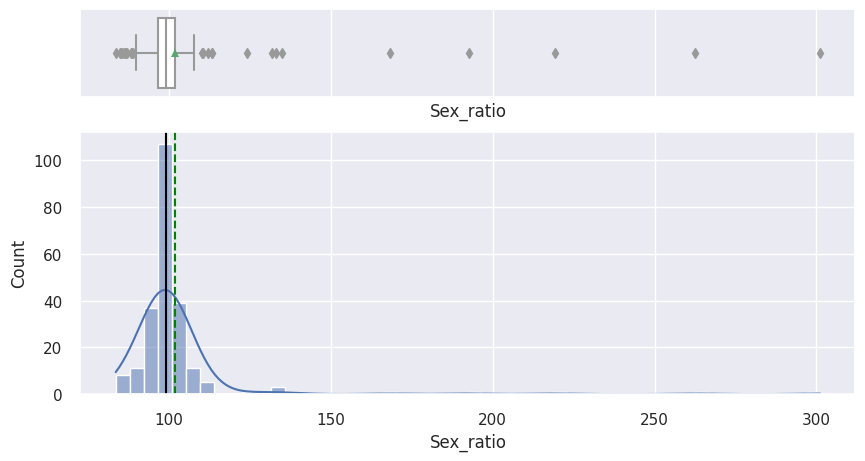

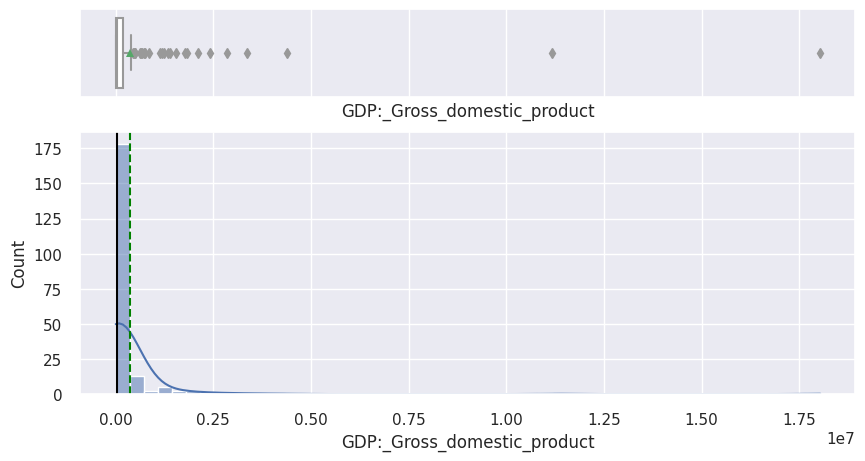

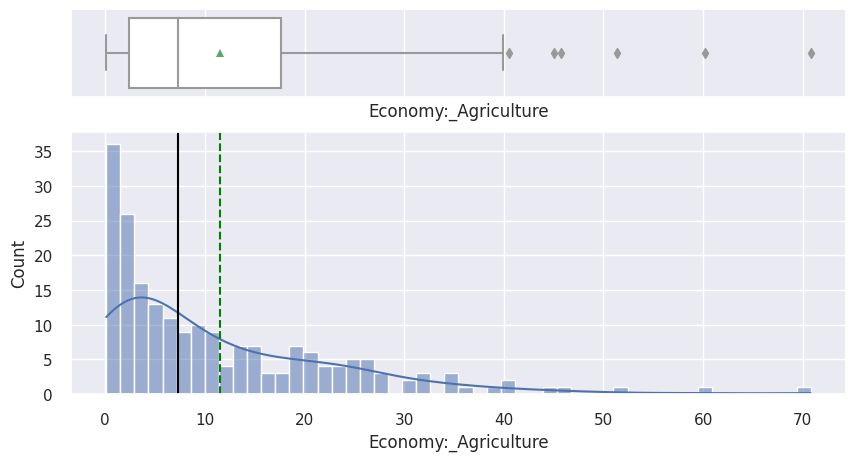

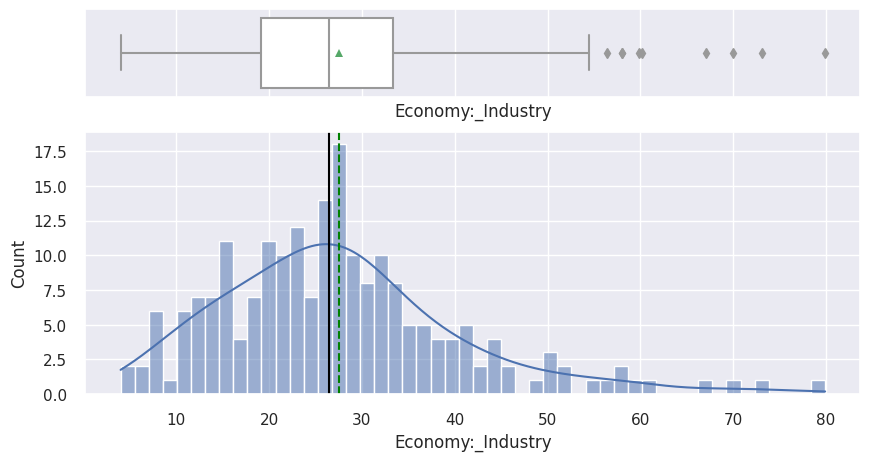

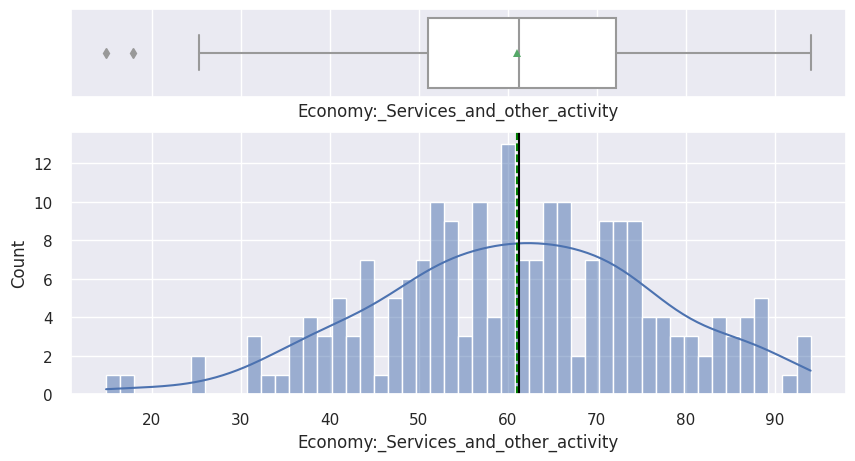

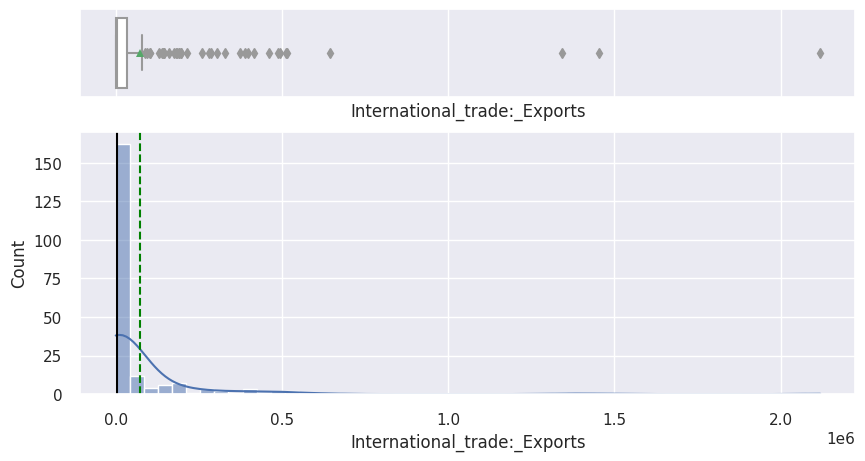

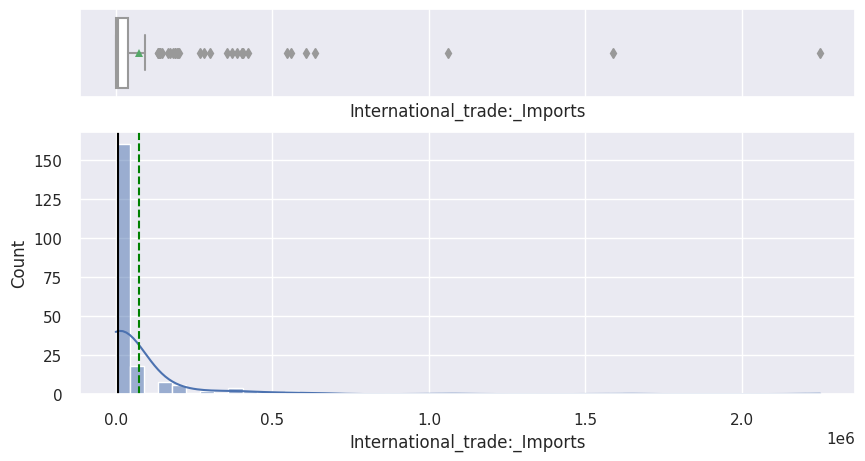

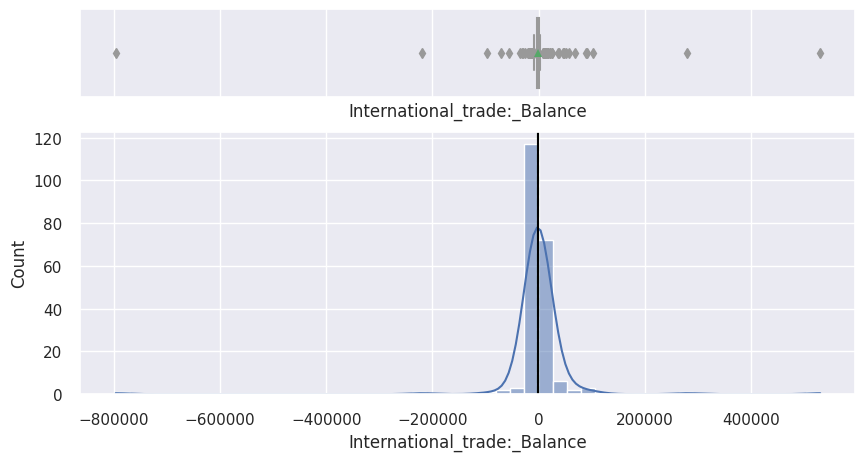

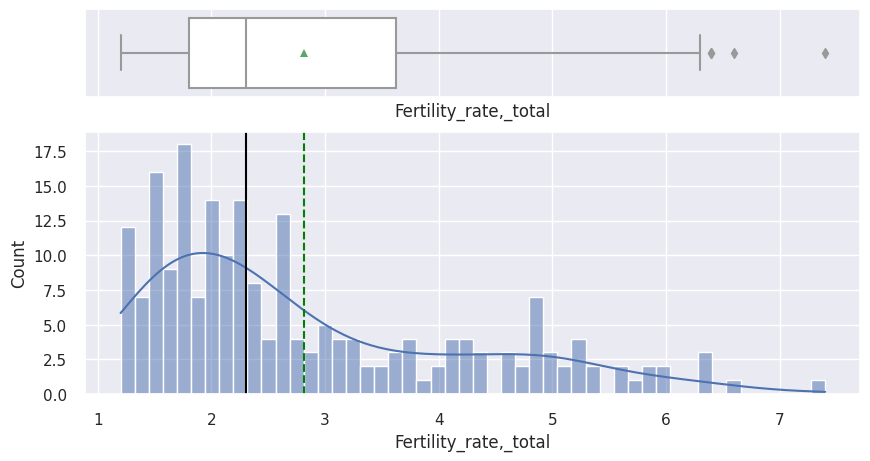

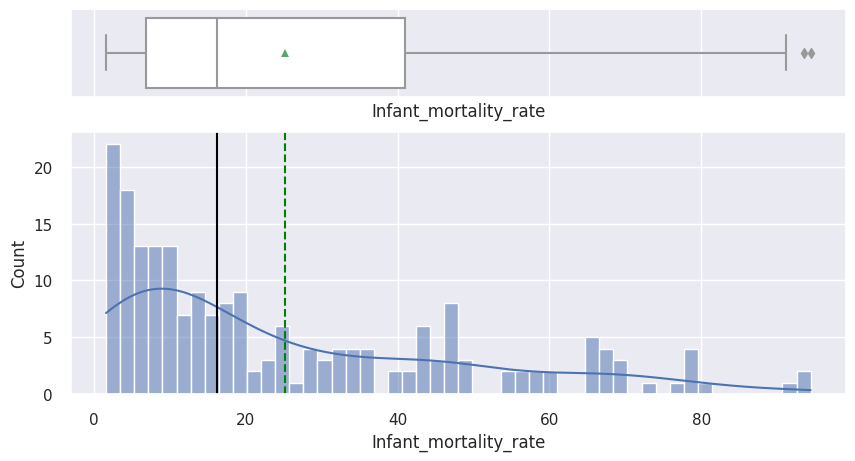

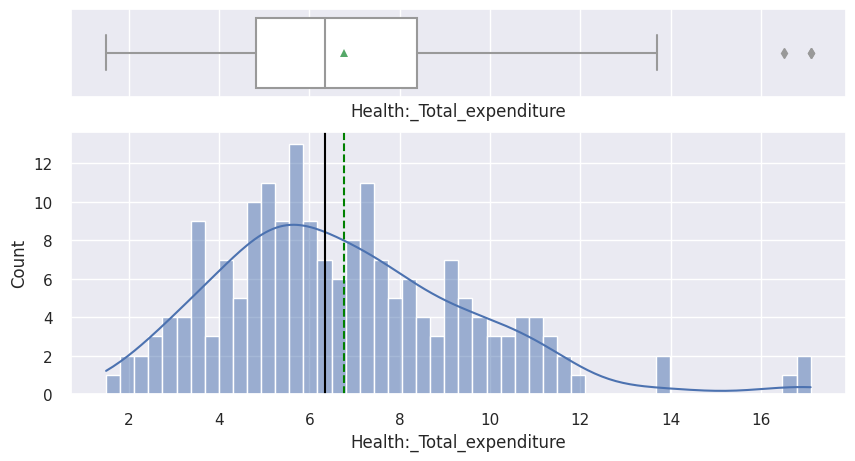

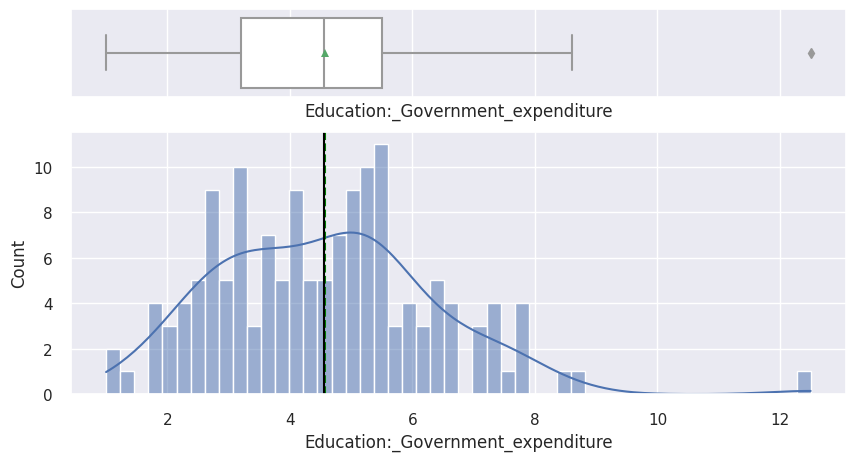

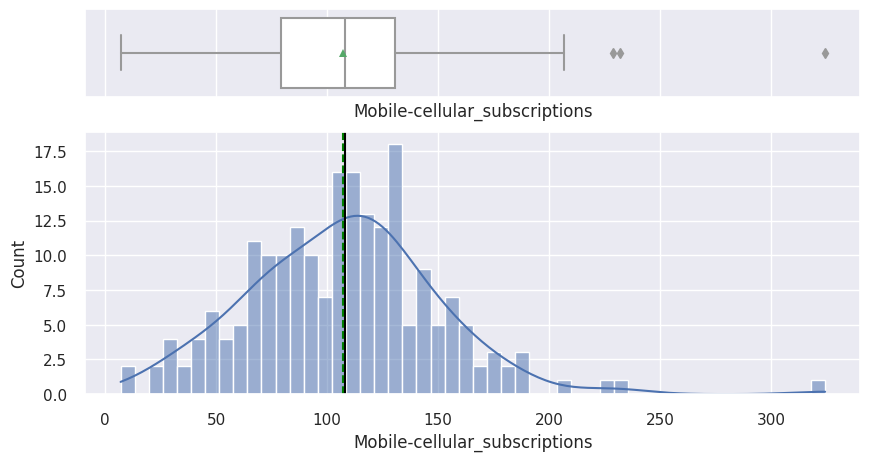

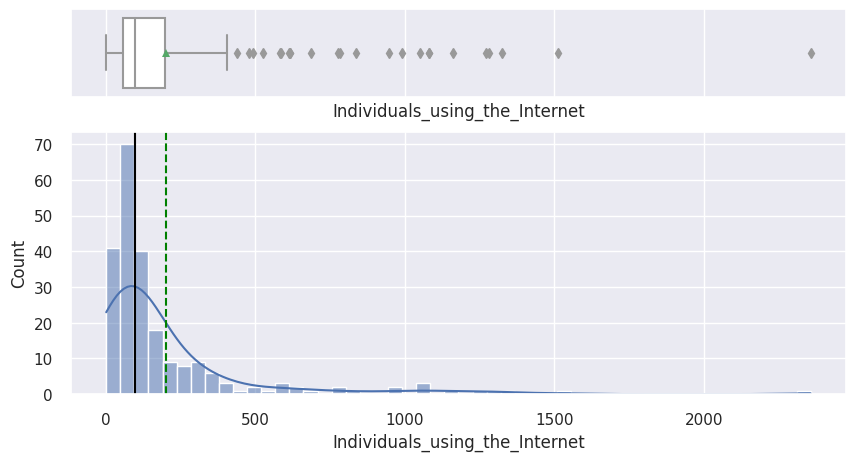

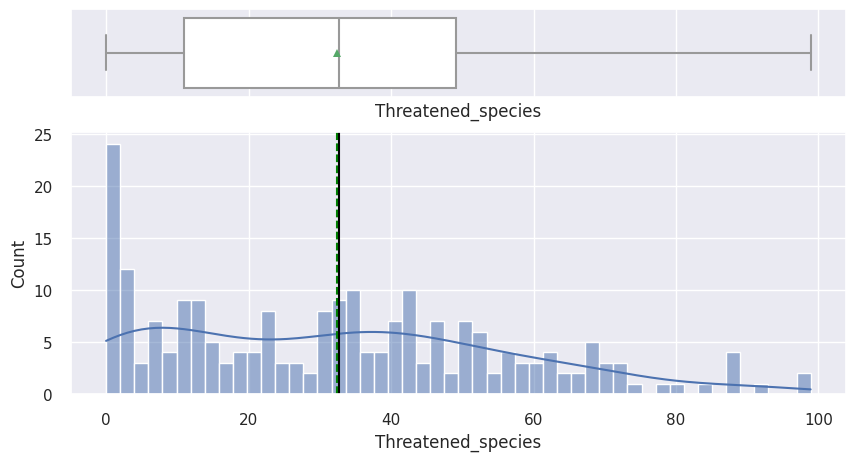

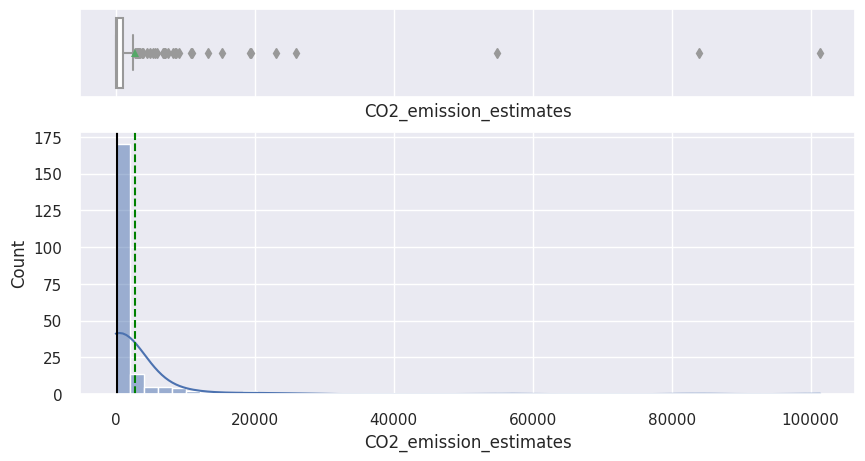

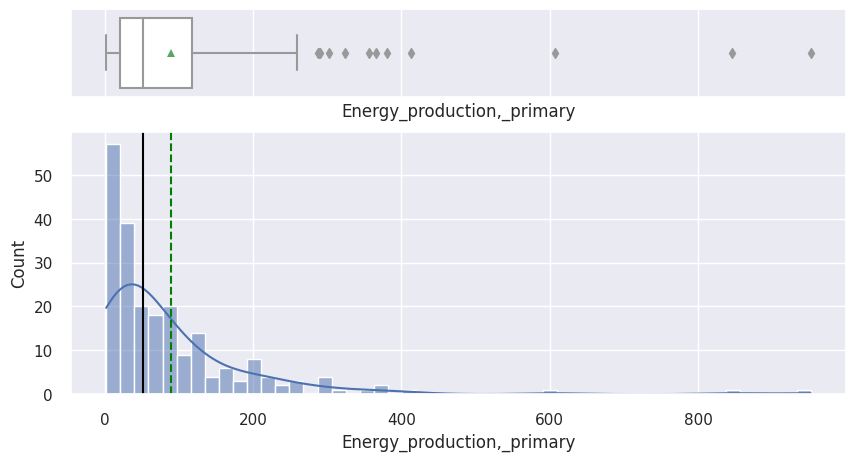

In [87]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))


## Treatment of Missing Values with Median

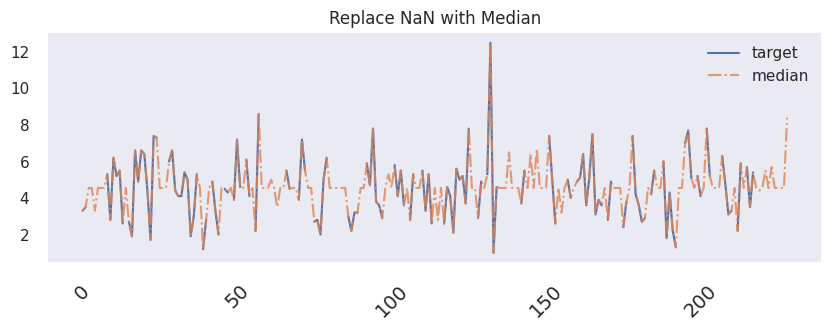

In [88]:
# Replace missing values with mean value for that attribute
plt.figure(figsize=(10,3))
plt.title('Replace NaN with Median')
plt.plot(df['Education:_Government_expenditure'], label='target')

# fillna to replace NaNs with provided value
vehicles = df['Education:_Government_expenditure'].fillna(df['Education:_Government_expenditure'].median())

plt.plot(vehicles,ls='-.',alpha=0.8,label='median')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

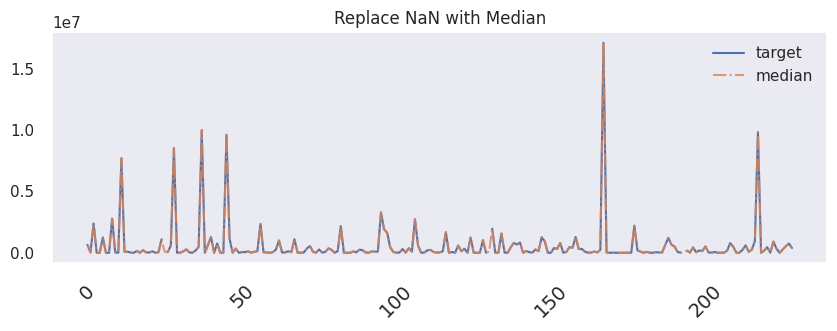

In [89]:
# Replace missing values with mean value for that attribute
plt.figure(figsize=(10,3))
plt.title('Replace NaN with Median')
plt.plot(df['Surface_area'], label='target')

# fillna to replace NaNs with provided value
vehicles = df['Surface_area'].fillna(df['Surface_area'].median())

plt.plot(vehicles,ls='-.',alpha=0.8,label='median')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

In [90]:
# Replace missing values with median
df1= df.fillna(df.median())
df1

<ipython-input-90-cc17684bbe17>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1= df.fillna(df.median())


country          Region  Surface_area  \
0                  Afghanistan    SouthernAsia      652864.0   
1                      Albania  SouthernEurope       28748.0   
2                      Algeria  NorthernAfrica     2381741.0   
3               American Samoa       Polynesia         199.0   
4                      Andorra  SouthernEurope         468.0   
..                         ...             ...           ...   
224  Wallis and Futuna Islands       Polynesia         142.0   
225             Western Sahara  NorthernAfrica      266000.0   
226                      Yemen     WesternAsia      527968.0   
227                     Zambia   EasternAfrica      752612.0   
228                   Zimbabwe   EasternAfrica      390757.0   

     Population_in_thousands  Population_density  Sex_ratio  \
0                      35530                54.4      106.3   
1                       2930               106.9      101.9   
2                      41318                17.3      102.0   
3                         56               278.2      103.6   
4                         77               163.8      102.3   
..                       ...                 ...        ...   
224                       12                84.1       93.4   
225                      553                 2.1      110.1   
226                    28250                53.5      102.1   
227                    17094                23.0       98.5   
228                    16530                42.7       95.0   

     GDP:_Gross_domestic_product  Economy:_Agriculture  Economy:_Industry  \
0                        20270.0                  23.3              23.30   
1                        11541.0                  22.4              26.00   
2                       164779.0                  12.2              37.30   
3                        23871.0                   7.3              26.45   
4                         2812.0                   0.5              10.80   
..                           ...                   ...                ...   
224                      23871.0                   7.3              26.45   
225                      23871.0                   7.3              26.45   
226                      29688.0                  14.7              36.90   
227                      21255.0                   8.2              32.30   
228                      13893.0                  13.0              30.50   

     Economy:_Services_and_other_activity  International_trade:_Exports  \
0                                    53.3                        1458.0   
1                                    51.7                        1962.0   
2                                    50.5                       29992.0   
3                                    61.3                        3893.0   
4                                    88.6                         100.0   
..                                    ...                           ...   
224                                  61.3                           1.0   
225                                  61.3                        3893.0   
226                                  48.4                         570.0   
227                                  59.5                        6505.0   
228                                  56.5                        2832.0   

     International_trade:_Imports  International_trade:_Balance  \
0                          3568.0                       -2110.0   
1                          4669.0                       -2707.0   
2                         47091.0                      -17099.0   
3                          6809.0                        -984.0   
4                          1355.0                       -1255.0   
..                            ...                           ...   
224                          53.0                         -51.0   
225                        6809.0                        -984.0   
226                        6861.0                       -6291.0   
2

In [91]:
df1.isnull().sum()



country                                 0
Region                                  0
Surface_area                            0
Population_in_thousands                 0
Population_density                      0
Sex_ratio                               0
GDP:_Gross_domestic_product             0
Economy:_Agriculture                    0
Economy:_Industry                       0
Economy:_Services_and_other_activity    0
International_trade:_Exports            0
International_trade:_Imports            0
International_trade:_Balance            0
Fertility_rate,_total                   0
Infant_mortality_rate                   0
Health:_Total_expenditure               0
Education:_Government_expenditure       0
Mobile-cellular_subscriptions           0
Individuals_using_the_Internet          0
Threatened_species                      0
CO2_emission_estimates                  0
Energy_production,_primary              0
dtype: int64

In [92]:
# copying the data to another variable to avoid any changes to original data
df = df1.copy()

In [93]:
df.isnull().sum()



country                                 0
Region                                  0
Surface_area                            0
Population_in_thousands                 0
Population_density                      0
Sex_ratio                               0
GDP:_Gross_domestic_product             0
Economy:_Agriculture                    0
Economy:_Industry                       0
Economy:_Services_and_other_activity    0
International_trade:_Exports            0
International_trade:_Imports            0
International_trade:_Balance            0
Fertility_rate,_total                   0
Infant_mortality_rate                   0
Health:_Total_expenditure               0
Education:_Government_expenditure       0
Mobile-cellular_subscriptions           0
Individuals_using_the_Internet          0
Threatened_species                      0
CO2_emission_estimates                  0
Energy_production,_primary              0
dtype: int64

<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-86-85453be69890>:19: UserWarning: Ignoring `palette` because no `hue` variable has

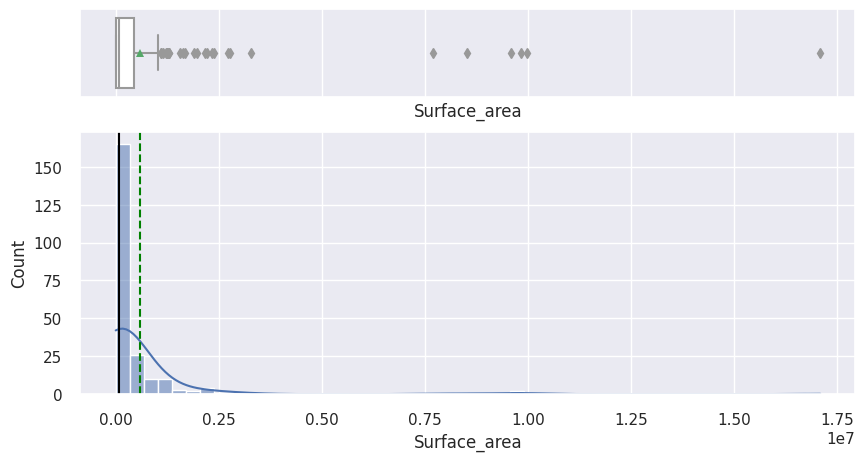

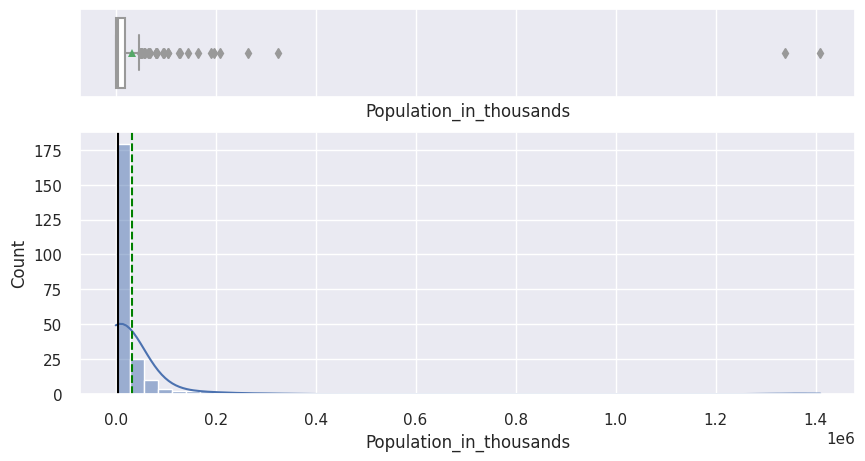

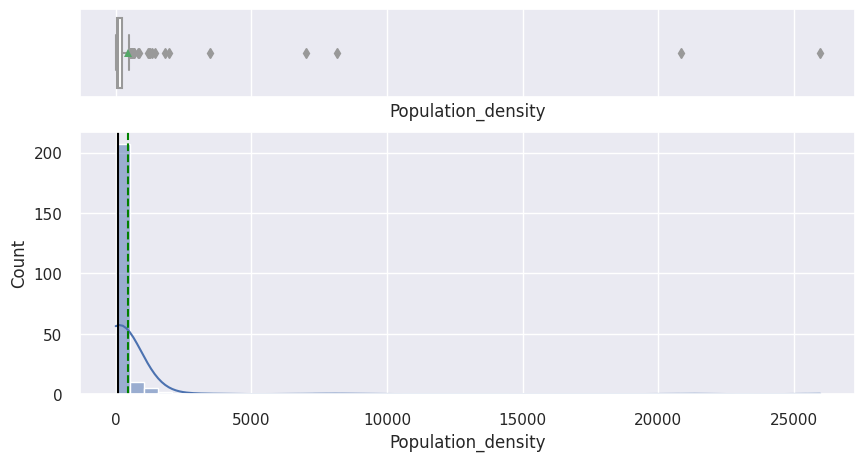

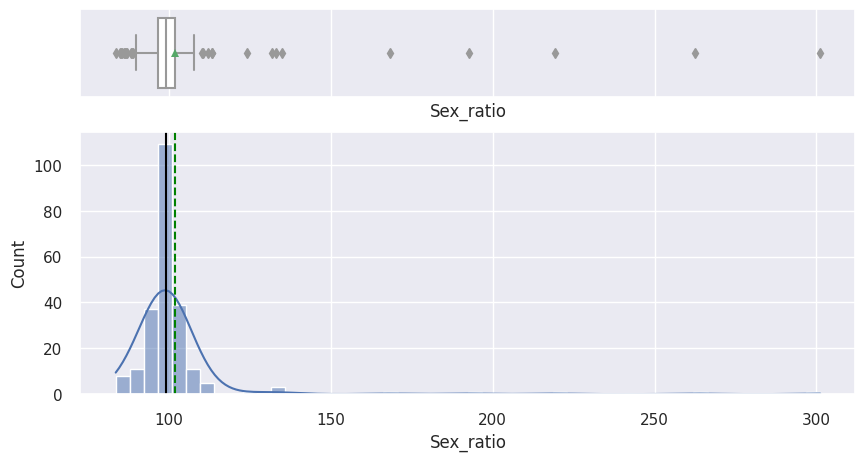

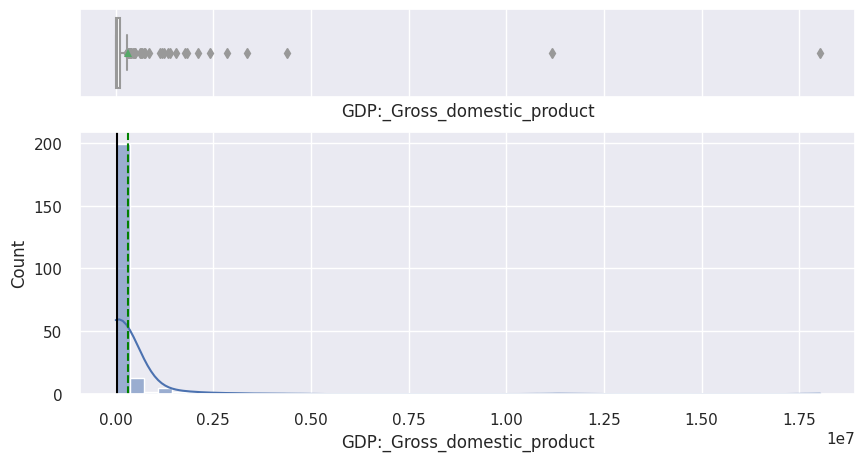

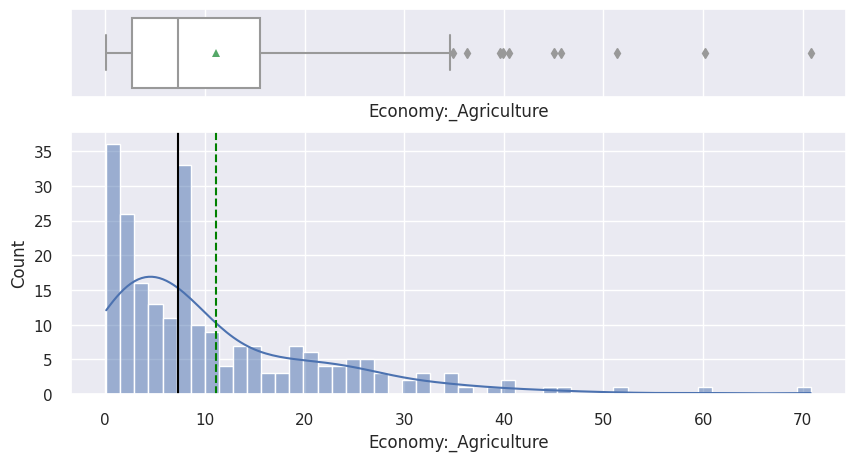

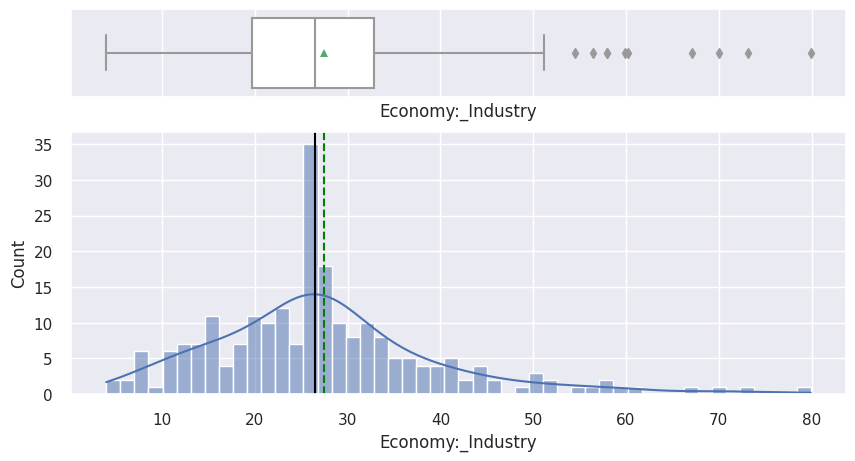

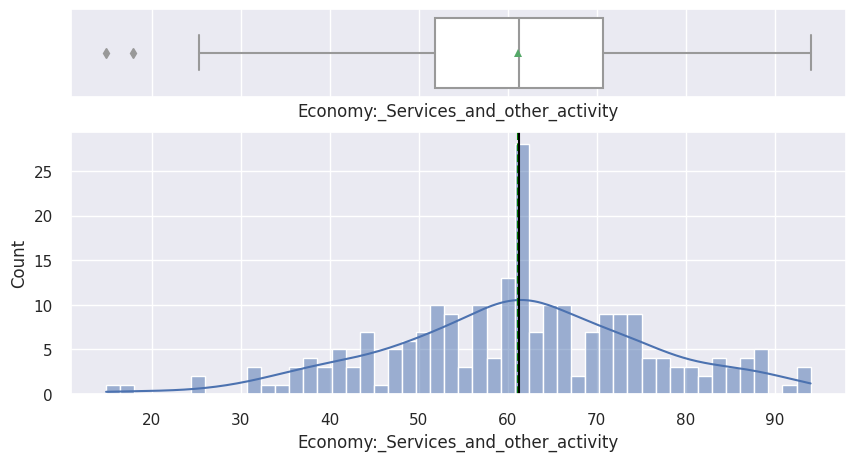

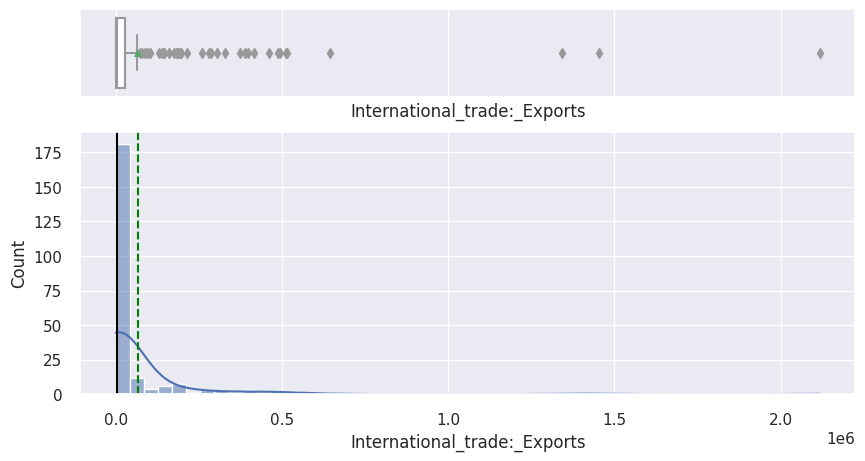

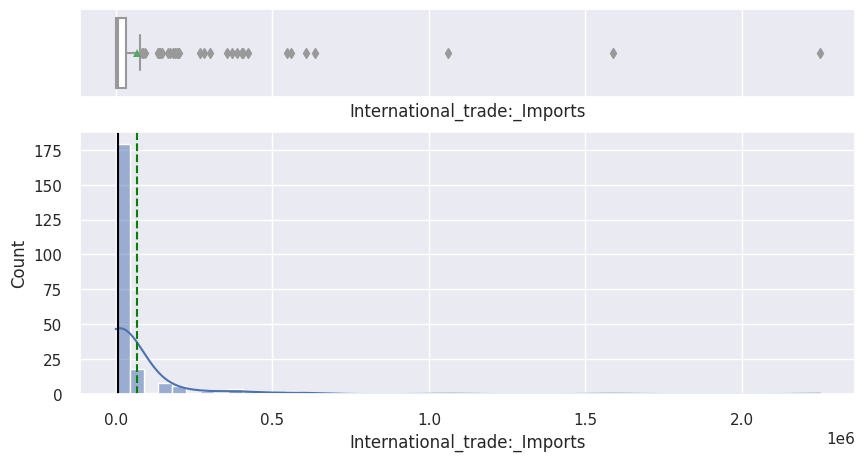

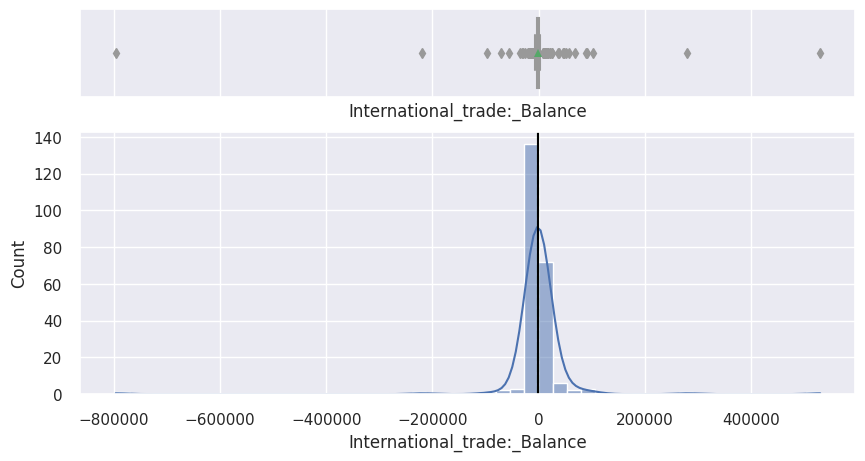

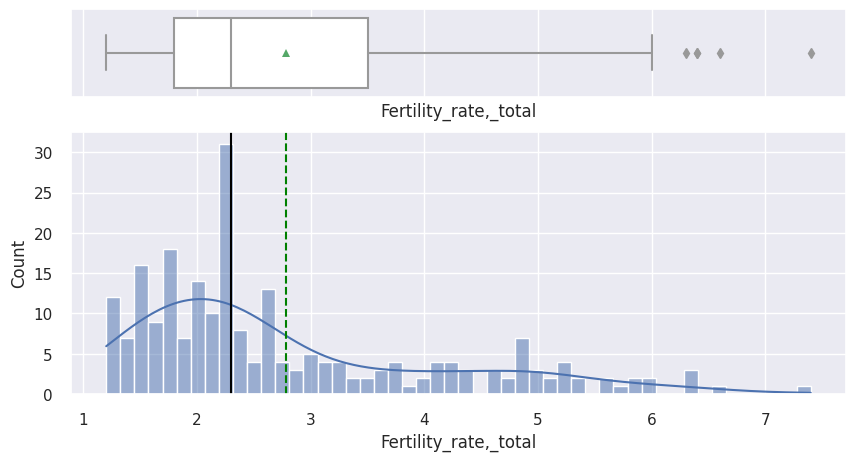

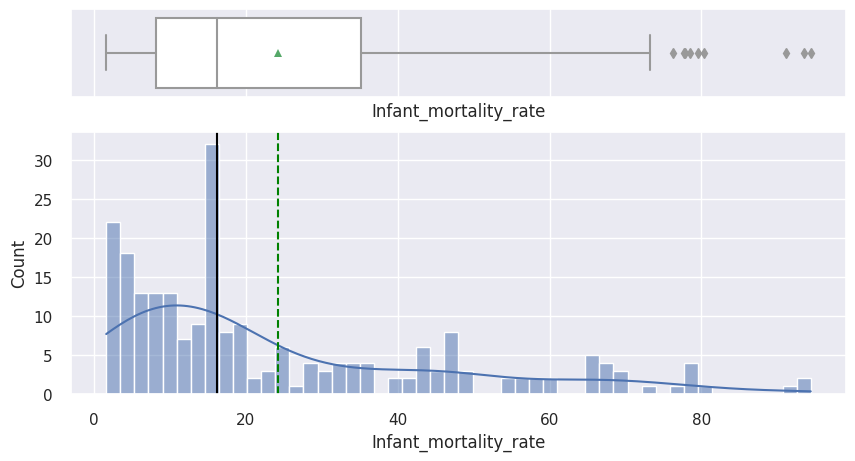

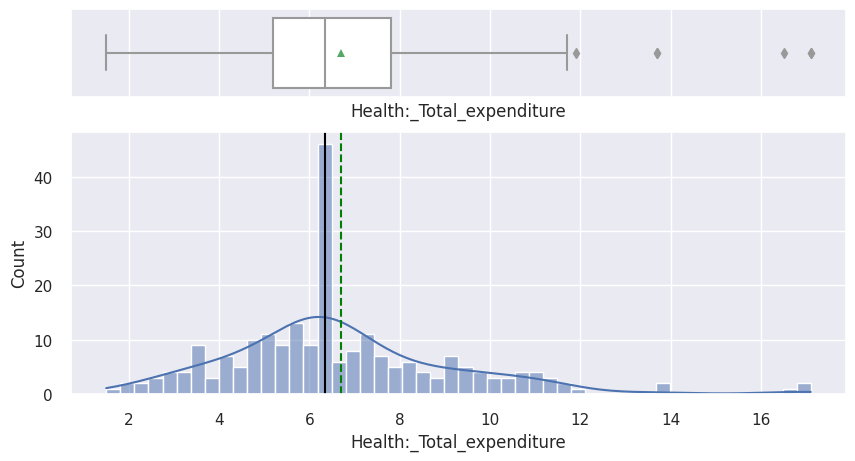

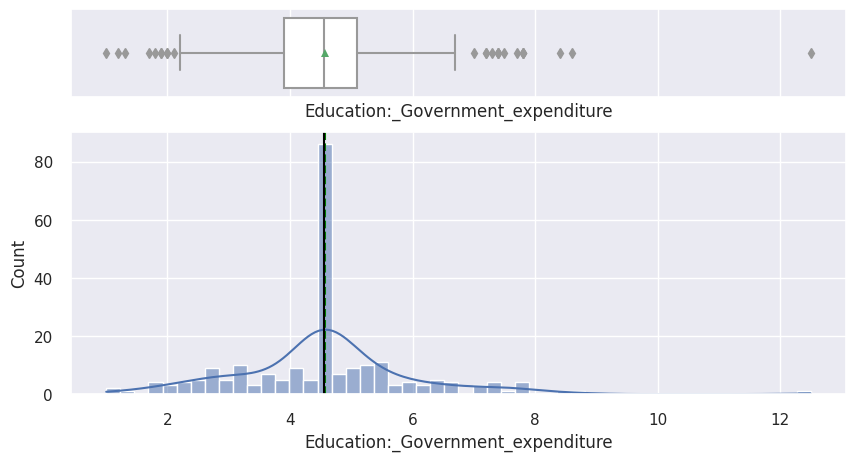

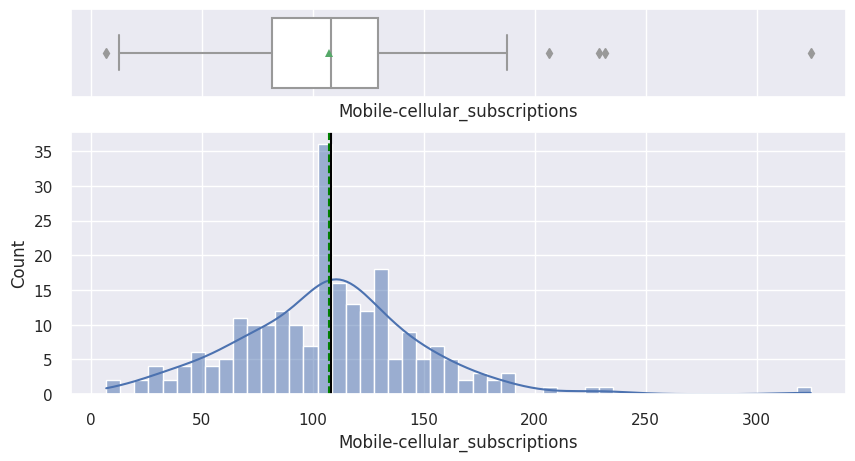

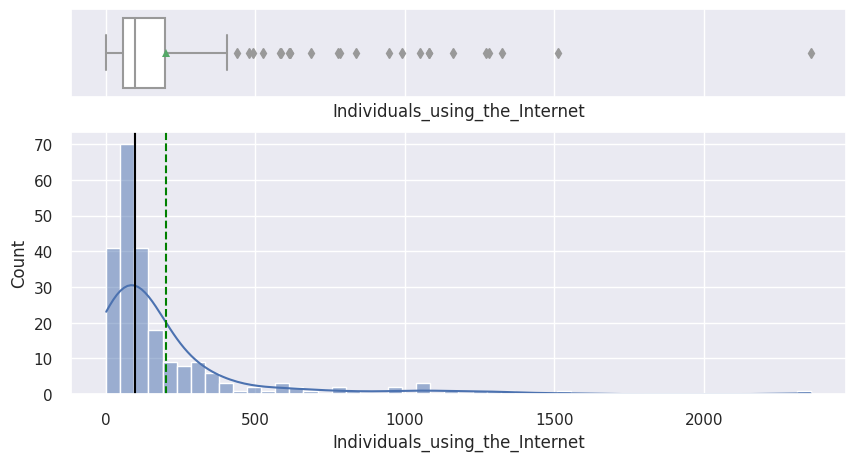

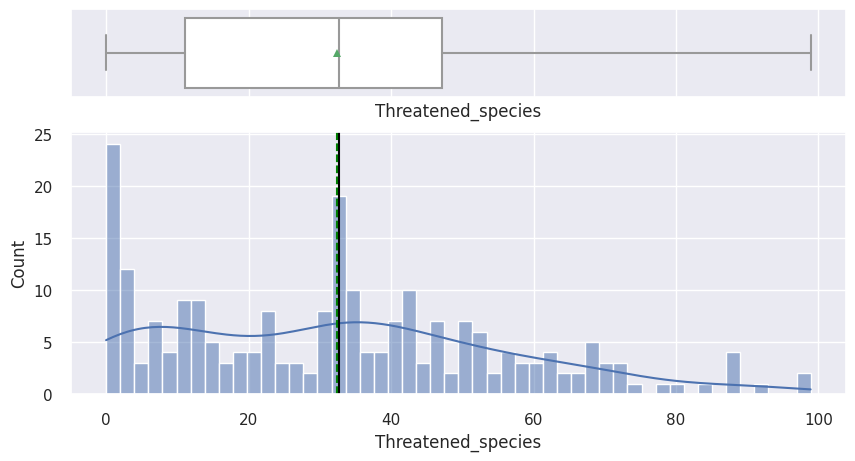

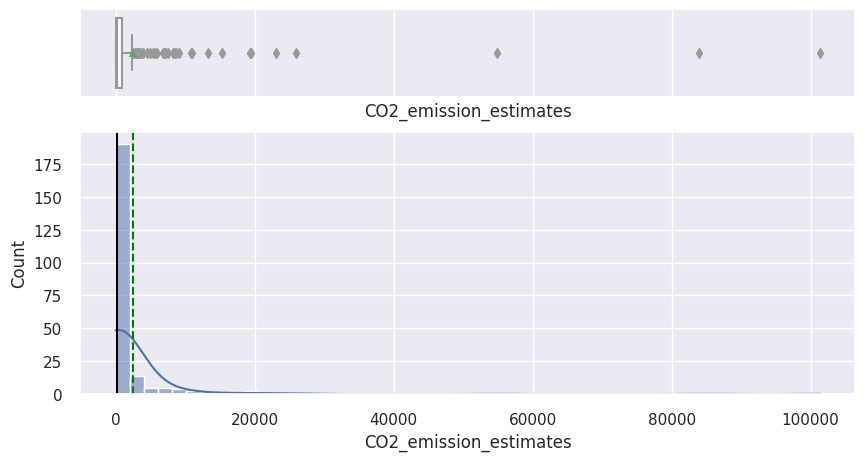

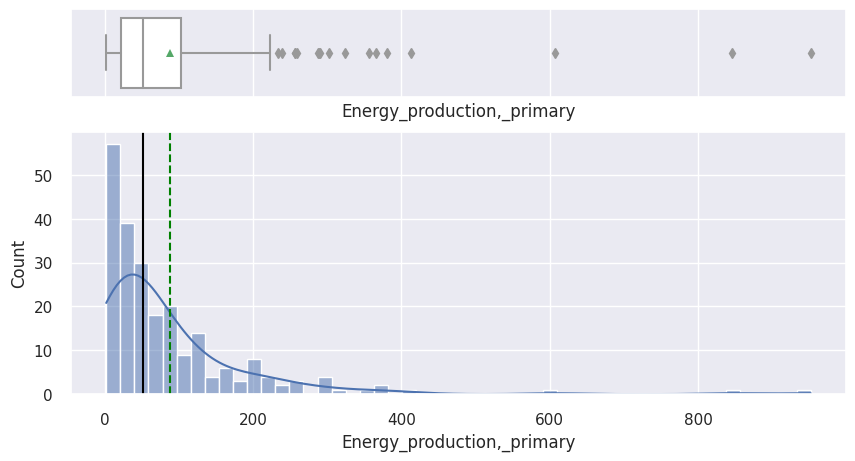

In [94]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))


### Outliers Check

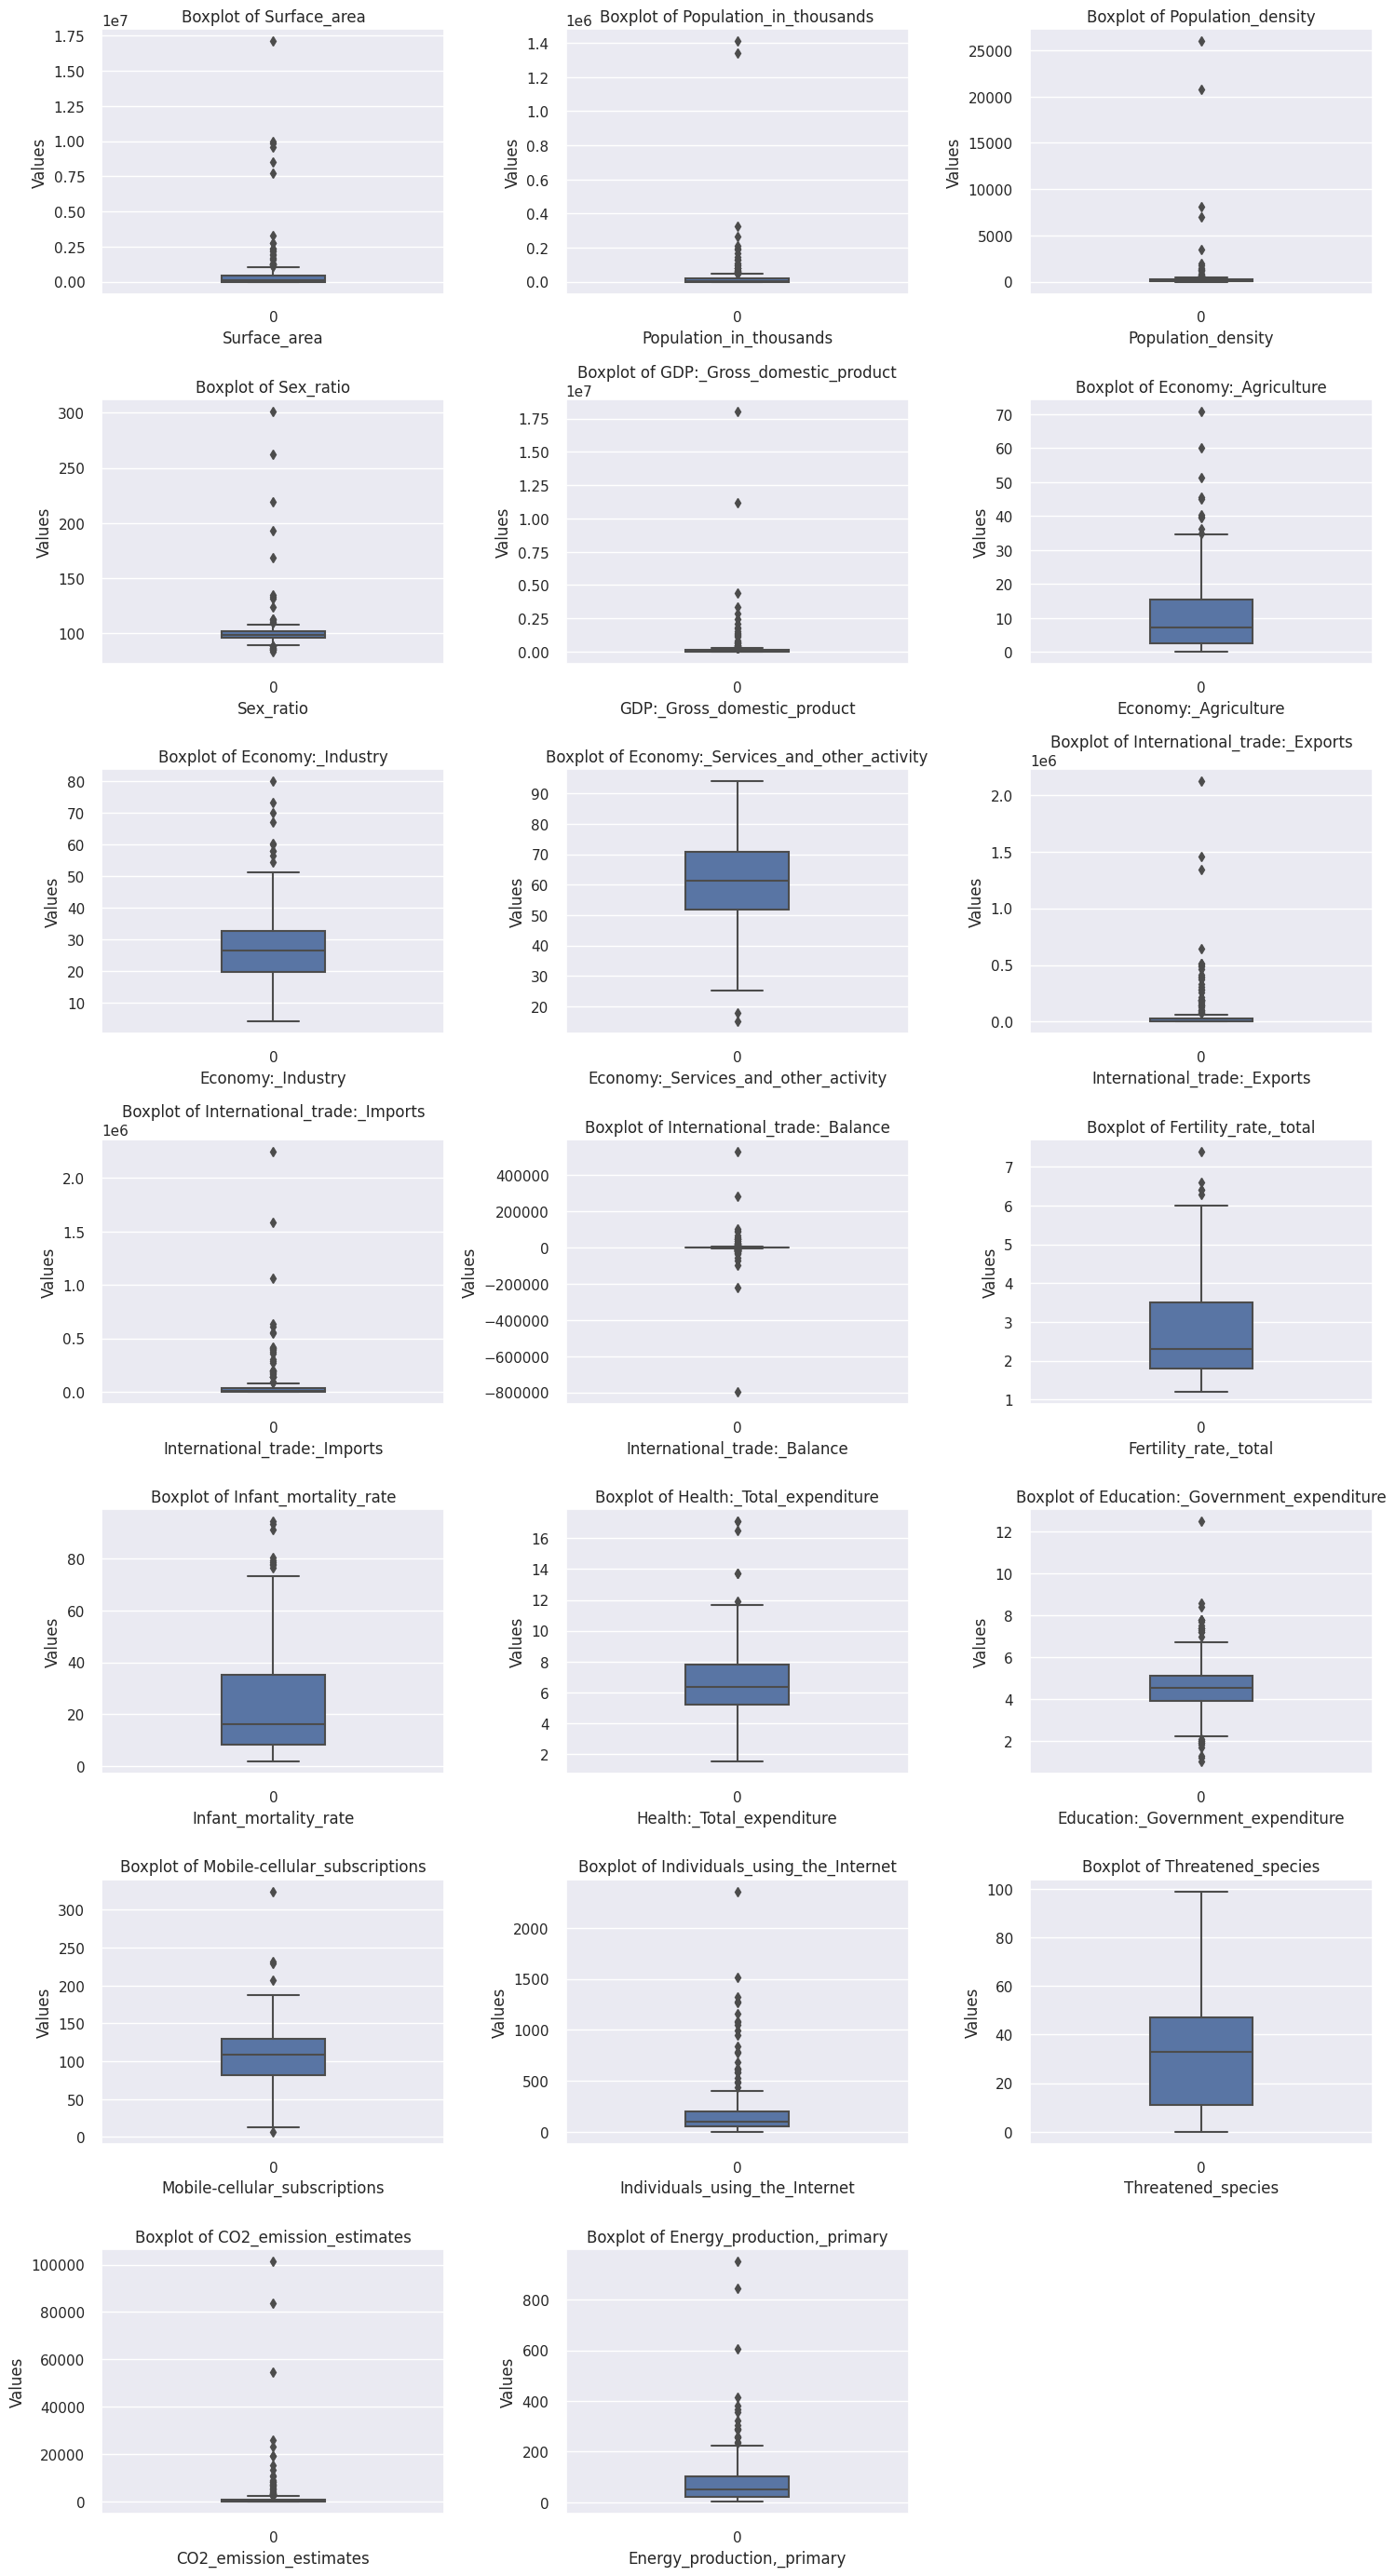

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Assuming you have already loaded your DataFrame 'df'

# Select numerical columns for plotting
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed for the grid
num_plots = len(numerical_columns)
num_rows = math.ceil(num_plots / 3)  # Change 3 to any desired number of columns

# Plot small boxplots for each numerical column
plt.figure(figsize=(15, 4 * num_rows))
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, 3, i+1)  # num_rows rows, 3 columns, index i+1 for each subplot
    sns.boxplot(data=df[col], width=0.3)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Values")

plt.tight_layout()
plt.show()


## K-Means Clustering

## Scaling

In [96]:
df.head()

country          Region  Surface_area  Population_in_thousands  \
0     Afghanistan    SouthernAsia      652864.0                    35530   
1         Albania  SouthernEurope       28748.0                     2930   
2         Algeria  NorthernAfrica     2381741.0                    41318   
3  American Samoa       Polynesia         199.0                       56   
4         Andorra  SouthernEurope         468.0                       77   

   Population_density  Sex_ratio  GDP:_Gross_domestic_product  \
0                54.4      106.3                      20270.0   
1               106.9      101.9                      11541.0   
2                17.3      102.0                     164779.0   
3               278.2      103.6                      23871.0   
4               163.8      102.3                       2812.0   

   Economy:_Agriculture  Economy:_Industry  \
0                  23.3              23.30   
1                  22.4              26.00   
2                  12.2              37.30   
3                   7.3              26.45   
4                   0.5              10.80   

   Economy:_Services_and_other_activity  International_trade:_Exports  \
0                                  53.3                        1458.0   
1                                  51.7                        1962.0   
2                                  50.5                       29992.0   
3                                  61.3                        3893.0   
4                                  88.6                         100.0   

   International_trade:_Imports  International_trade:_Balance  \
0                        3568.0                       -2110.0   
1                        4669.0                       -2707.0   
2                       47091.0                      -17099.0   
3                        6809.0                        -984.0   
4                        1355.0                       -1255.0   

   Fertility_rate,_total  Infant_mortality_rate  Health:_Total_expenditure  \
0                    5.3                  68.60                       8.20   
1                    1.7                  14.60                       5.90   
2                    3.0                  27.70                       7.20   
3                    2.6                   9.60                       6.35   
4                    1.2                  16.25                       8.10   

   Education:_Government_expenditure  Mobile-cellular_subscriptions  \
0                               3.30                           61.6   
1                               3.50                          106.4   
2                               4.55                          113.0   
3                               4.55                          108.2   
4                               3.30                           88.1   

   Individuals_using_the_Internet  Threatened_species  CO2_emission_estimates  \
0                            42.0                 2.1                    63.0   
1                           130.0                28.2                    84.0   
2                           135.0                 0.8                  5900.0   
3                            92.0                87.9                   143.0   
4                            13.0                34.0                     1.0   

   Energy_production,_primary  
0                         5.0  
1                        36.0  
2                        55.0  
3                        51.0  
4                       119.0

In [97]:
from sklearn.preprocessing import StandardScaler

# Select the numerical variables to scale
numerical_vars = [
    'Surface_area',
    'Population_in_thousands',
    'Population_density',
    'Sex_ratio',
    'GDP:_Gross_domestic_product',
    'Economy:_Agriculture',
    'Economy:_Industry',
    'Economy:_Services_and_other_activity',
    'International_trade:_Exports',
    'International_trade:_Imports',
    'International_trade:_Balance',
    'Fertility_rate,_total',
    'Infant_mortality_rate',
    'Health:_Total_expenditure',
    'Education:_Government_expenditure',
    'Mobile-cellular_subscriptions',
    'Individuals_using_the_Internet',
    'Threatened_species',
    'CO2_emission_estimates',
    'Energy_production,_primary'
]


# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical variables
df1[numerical_vars] = scaler.fit_transform(df1[numerical_vars])


In [98]:
df1.head()

country          Region  Surface_area  Population_in_thousands  \
0     Afghanistan    SouthernAsia      0.037238                 0.020854   
1         Albania  SouthernEurope     -0.313151                -0.224289   
2         Algeria  NorthernAfrica      1.007858                 0.064378   
3  American Samoa       Polynesia     -0.329179                -0.245901   
4         Andorra  SouthernEurope     -0.329028                -0.245743   

   Population_density  Sex_ratio  GDP:_Gross_domestic_product  \
0           -0.177549   0.206068                    -0.205670   
1           -0.154727  -0.001483                    -0.211588   
2           -0.193677   0.003234                    -0.107697   
3           -0.080260   0.078707                    -0.203229   
4           -0.129991   0.017385                    -0.217506   

   Economy:_Agriculture  Economy:_Industry  \
0              1.061700          -0.333522   
1              0.983420          -0.117215   
2              0.096245           0.788072   
3             -0.329946          -0.081163   
4             -0.921396          -1.334946   

   Economy:_Services_and_other_activity  International_trade:_Exports  \
0                             -0.529713                     -0.311091   
1                             -0.638251                     -0.308742   
2                             -0.719654                     -0.178136   
3                              0.012975                     -0.299745   
4                              1.864897                     -0.317418   

   International_trade:_Imports  International_trade:_Balance  \
0                     -0.301133                     -0.020041   
1                     -0.296073                     -0.028579   
2                     -0.101111                     -0.234417   
3                     -0.286238                     -0.003936   
4                     -0.311304                     -0.007812   

   Fertility_rate,_total  Infant_mortality_rate  Health:_Total_expenditure  \
0               1.877252               2.027993                   0.591834   
1              -0.804444              -0.437770                  -0.311306   
2               0.163946               0.160406                   0.199164   
3              -0.134020              -0.666081                  -0.134605   
4              -1.176901              -0.362427                   0.552567   

   Education:_Government_expenditure  Mobile-cellular_subscriptions  \
0                          -0.885404                      -1.116735   
1                          -0.745257                      -0.025184   
2                          -0.009486                       0.135625   
3                          -0.009486                       0.018673   
4                          -0.885404                      -0.471063   

   Individuals_using_the_Internet  Threatened_species  CO2_emission_estimates  \
0                       -0.533729           -1.272815               -0.245034   
1                       -0.235651           -0.175164               -0.242909   
2                       -0.218714           -1.327487                0.345398   
3                       -0.364366            2.335554               -0.236941   
4                       -0.631959            0.068758               -0.251305   

   Energy_production,_primary  
0                   -0.712976  
1                   -0.444736  
2                   -0.280331  
3                   -0.314943  
4                    0.273454

## Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

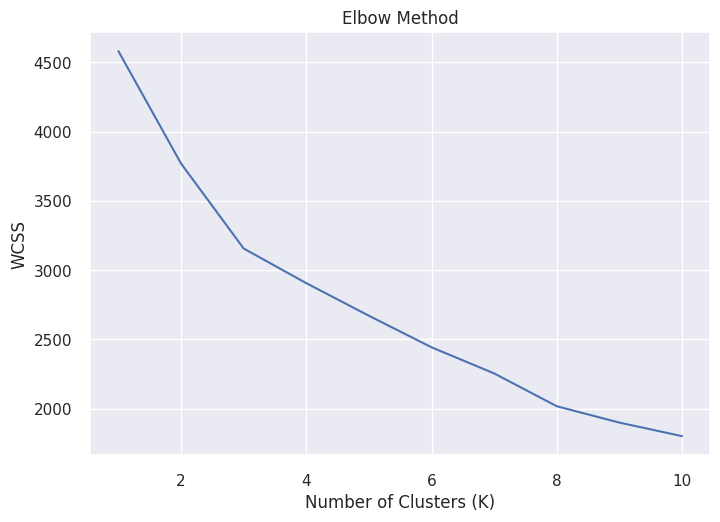

In [99]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the numerical features for clustering# Select the numerical variables to scale
numerical_features = [
    'Surface_area',
    'Population_in_thousands',
    'Population_density',
    'Sex_ratio',
    'GDP:_Gross_domestic_product',
    'Economy:_Agriculture',
    'Economy:_Industry',
    'Economy:_Services_and_other_activity',
    'International_trade:_Exports',
    'International_trade:_Imports',
    'International_trade:_Balance',
    'Fertility_rate,_total',
    'Infant_mortality_rate',
    'Health:_Total_expenditure',
    'Education:_Government_expenditure',
    'Mobile-cellular_subscriptions',
    'Individuals_using_the_Internet',
    'Threatened_species',
    'CO2_emission_estimates',
    'Energy_production,_primary'
]


# Create an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Perform K-means clustering for different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1[numerical_features])
    wcss.append(kmeans.inertia_)  # Get the WCSS

# Plot the WCSS against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


- We see 3 clusters would be sufficient

### Sihouette_Score

In [100]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Select numerical features for clustering
numerical_features = [
    'Surface_area',
    'Population_in_thousands',
    'Population_density',
    'Sex_ratio',
    'GDP:_Gross_domestic_product',
    'Economy:_Agriculture',
    'Economy:_Industry',
    'Economy:_Services_and_other_activity',
    'International_trade:_Exports',
    'International_trade:_Imports',
    'International_trade:_Balance',
    'Fertility_rate,_total',
    'Infant_mortality_rate',
    'Health:_Total_expenditure',
    'Education:_Government_expenditure',
    'Mobile-cellular_subscriptions',
    'Individuals_using_the_Internet',
    'Threatened_species',
    'CO2_emission_estimates',
    'Energy_production,_primary'
]


X = df1[numerical_features]

# Define range of K values
k_values = range(2, 11)

# Perform clustering and calculate silhouette coefficient for each K value
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Find the index of the maximum silhouette score
best_k_index = np.argmax(silhouette_scores)
best_k = k_values[best_k_index]

# Print the silhouette scores and the best K
for k, score in zip(k_values, silhouette_scores):
    print(f"Silhouette score for K={k}: {score:.3f}")

print(f"Best K: {best_k}")




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette score for K=2: 0.777
Silhouette score for K=3: 0.214
Silhouette score for K=4: 0.213
Silhouette score for K=5: 0.213
Silhouette score for K=6: 0.122
Silhouette score for K=7: 0.206
Silhouette score for K=8: 0.203
Silhouette score for K=9: 0.120
Silhouette score for K=10: 0.216
Best K: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


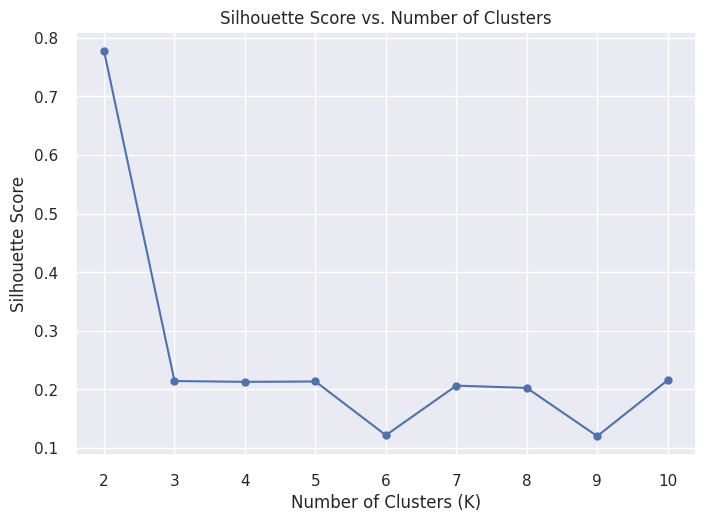

In [101]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()



### Summary CLusters

In [102]:
from sklearn.cluster import KMeans

# Select numerical features for clustering
# Select numerical features for clustering
numerical_features = [
    'Surface_area',
    'Population_in_thousands',
    'Population_density',
    'Sex_ratio',
    'GDP:_Gross_domestic_product',
    'Economy:_Agriculture',
    'Economy:_Industry',
    'Economy:_Services_and_other_activity',
    'International_trade:_Exports',
    'International_trade:_Imports',
    'International_trade:_Balance',
    'Fertility_rate,_total',
    'Infant_mortality_rate',
    'Health:_Total_expenditure',
    'Education:_Government_expenditure',
    'Mobile-cellular_subscriptions',
    'Individuals_using_the_Internet',
    'Threatened_species',
    'CO2_emission_estimates',
    'Energy_production,_primary'
]

X = df[numerical_features]

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

# Assign cluster labels to the DataFrame
df['Cluster'] = labels

# Create separate DataFrames for cluster 0 and cluster 1
cluster_0_data = df[df['Cluster'] == 0]
cluster_1_data = df[df['Cluster'] == 1]
cluster_2_data = df[df['Cluster'] == 2]

# Concatenate the DataFrames
cluster_data = pd.concat([cluster_0_data, cluster_1_data, cluster_2_data])

cluster_data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


country           Region  Surface_area  \
0                 Afghanistan     SouthernAsia      652864.0   
1                     Albania   SouthernEurope       28748.0   
2                     Algeria   NorthernAfrica     2381741.0   
3              American Samoa        Polynesia         199.0   
4                     Andorra   SouthernEurope         468.0   
..                        ...              ...           ...   
217  United States of America  NorthernAmerica     9833517.0   
11                  Australia          Oceania     7692060.0   
28                     Brazil     SouthAmerica     8515767.0   
37                     Canada  NorthernAmerica     9984670.0   
167        Russian Federation    EasternEurope    17098246.0   

     Population_in_thousands  Population_density  Sex_ratio  \
0                      35530                54.4      106.3   
1                       2930               106.9      101.9   
2                      41318                17.3      102.0   
3                         56               278.2      103.6   
4                         77               163.8      102.3   
..                       ...                 ...        ...   
217                   324460                35.5       98.0   
11                     24451                 3.2       99.3   
28                    209288                25.0       96.6   
37                     36624                 4.0       98.5   
167                   143990                 8.8       86.8   

     GDP:_Gross_domestic_product  Economy:_Agriculture  Economy:_Industry  \
0                        20270.0                  23.3              23.30   
1                        11541.0                  22.4              26.00   
2                       164779.0                  12.2              37.30   
3                        23871.0                   7.3              26.45   
4                         2812.0                   0.5              10.80   
..                           ...                   ...                ...   
217                   18036648.0                   1.0              19.70   
11                     1230859.0                   2.5              26.50   
28                     1772591.0                   5.2              22.70   
37                     1552808.0                   1.8              28.60   
167                    1326016.0                   4.7              31.80   

     Economy:_Services_and_other_activity  International_trade:_Exports  \
0                                    53.3                        1458.0   
1                                    51.7                        1962.0   
2                                    50.5                       29992.0   
3                                    61.3                        3893.0   
4                                    88.6                         100.0   
..                                    ...                           ...   
217                                  79.3                     1453167.0   
11                                   71.1                      189630.0   
28                                   72.0                      185235.0   
37                                   69.6                      388911.0   
167                                  63.5                      285491.0   

     International_trade:_Imports  International_trade:_Balance  \
0                          3568.0                       -2110.0   
1                          4669.0                       -2707.0   
2                         47091.0                      -17099.0   
3                          6809.0                        -984.0   
4                          1355.0                       -1255.0   
..                            ...                           ...   
217                     2249661.0                     -796494.0   
11                       189406.0                         224.0   
28                       137552.0                       47683.0   


### Statistical Cluster Summary

In [103]:
# let's view the statistical summary of the non-numerical columns in the data
cluster_data.describe(include=np.number).T.style.highlight_max(color="lightgreen", axis=0)

In [104]:
# Print categorical summary
print('Categorical Summary:')
cluster_data.describe(include=['object']).T

Categorical Summary:


count unique          top freq
country   229    229  Afghanistan    1
Region    229     22    Caribbean   25

### Correlation Analysis

<ipython-input-105-71f9bc54786f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = cluster_data.corr().round(4)


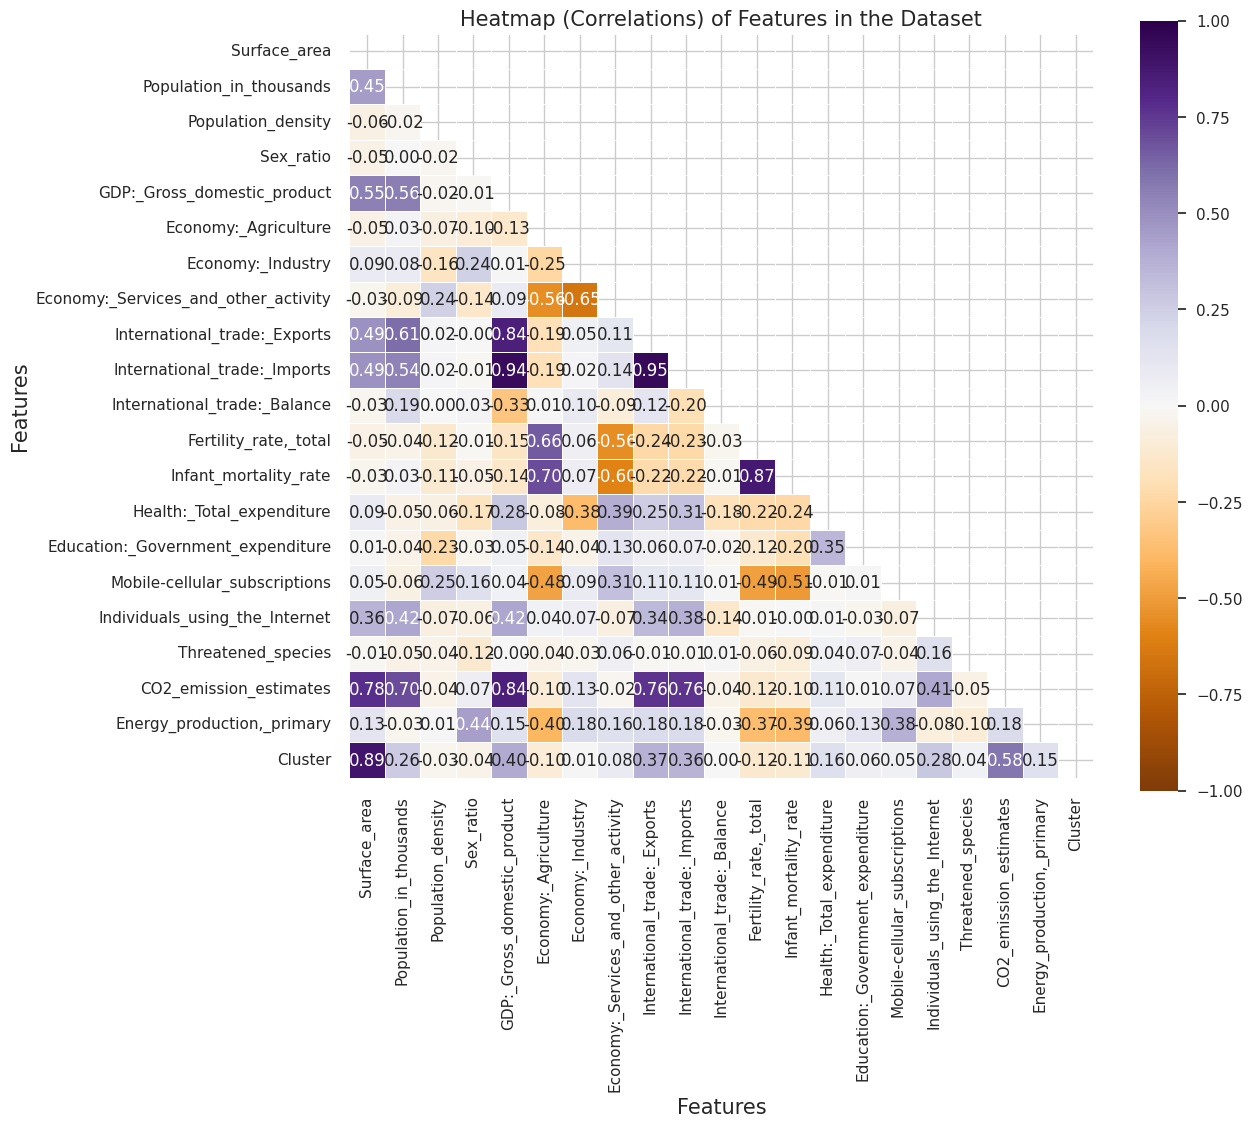

In [105]:
# Create a correlation for the dataset.
dataset_corr = cluster_data.corr().round(4)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Create a correlation matrix. Only bottom left corner valued.
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn.
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.2f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()


In [106]:
from sklearn.cluster import KMeans

# Select numerical features for clustering
numerical_features = [
    'Surface_area',
    'Population_in_thousands',
    'Population_density',
    'Sex_ratio',
    'GDP:_Gross_domestic_product',
    'Economy:_Agriculture',
    'Economy:_Industry',
    'Economy:_Services_and_other_activity',
    'International_trade:_Exports',
    'International_trade:_Imports',
    'International_trade:_Balance',
    'Fertility_rate,_total',
    'Infant_mortality_rate',
    'Health:_Total_expenditure',
    'Education:_Government_expenditure',
    'Mobile-cellular_subscriptions',
    'Individuals_using_the_Internet',
    'Threatened_species',
    'CO2_emission_estimates',
    'Energy_production,_primary'
]

X = df[numerical_features]

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

# Assign cluster labels to the DataFrame
df['Cluster'] = labels

# Get mean and count of variables under different clusters
cluster_data = df.groupby('Cluster').agg(['mean', 'count'])

# Print the cluster profiles
cluster_data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-106-c38695fd32aa>:37: FutureWarning: ['country', 'Region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_data = df.groupby('Cluster').agg(['mean', 'count'])


Surface_area       Population_in_thousands       Population_density  \
                 mean count                    mean count               mean   
Cluster                                                                        
0        3.210422e+05   223            24004.376682   223         474.261435   
1        9.716758e+06     2           866988.500000     2          92.800000   
2        1.082269e+07     4           103588.250000     4          10.250000   

               Sex_ratio       GDP:_Gross_domestic_product        \
        count       mean count                        mean count   
Cluster                                                            
0         223  102.04843   223                1.750419e+05   223   
1           2  102.15000     2                1.459755e+07     2   
2           4   95.30000     4                1.470568e+06     4   

        Economy:_Agriculture       Economy:_Industry        \
                        mean count              mean count   
Cluster                                                      
0                  11.282511   223         27.437892   223   
1                   5.100000     2         30.400000     2   
2                   3.550000     4         27.400000     4   

        Economy:_Services_and_other_activity        \
                                        mean count   
Cluster                                              
0                                  60.935874   223   
1                                  64.500000     2   
2                                  69.050000     4   

        International_trade:_Exports       International_trade:_Imports        \
                                mean count                         mean count   
Cluster                                                                         
0                       4.933451e+04   223                 4.964802e+04   223   
1                       1.786074e+06     2                 1.919178e+06     2   
2                       2.623168e+05     4                 2.280422e+05     4   

        International_trade:_Balance       Fertility_rate,_total        \
                                mean count                  mean count   
Cluster                                                                  
0                        -148.860987   223              2.807623   223   
1                     -133104.500000     2              1.750000     2   
2                       34274.500000     4              1.750000     4   

        Infant_mortality_rate       Health:_Total_expenditure        \
                         mean count                      mean count   
Cluster                                                               
0                   24.612332   223                  6.613677   223   
1                    8.800000     2                 11.300000     2   
2                    8.175000     4                  8.800000     4   

        Education:_Government_expenditure       Mobile-cellular_subscriptions  \
                                     mean count                          mean   
Cluster                                                                         
0                                4.550224   223                    107.130942   
1                                4.975000     2                    105.400000   
2                                5.100000     4                    125.325000   

              Individuals_using_the_Internet       Threatened_species        \
        count                           mean count               mean count   
Cluster                                                                       
0         223                     183.020179   223          32.252466   223   
1           2                    1296.500000     2          27.950000     2   
2           4                     573.750000     4          40.850000     4   

        CO2_emission_estimates       Energy_production,_primary        
                          me

## Hierachial Clustering

In [107]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet

# Assuming df1_scaled is your scaled data DataFrame
df1_scaled = df1[numerical_features]

# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted","centroid","ward"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(pdist(df1_scaled, metric=dm), method=lm)
        c, coph_dists = cophenet(Z, pdist(df1_scaled, metric=dm))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

print(
    "Best Cophenetic Correlation: {} for {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)


Cophenetic correlation for Euclidean distance and single linkage is 0.919440877630657.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7628168457052624.
Cophenetic correlation for Euclidean distance and average linkage is 0.9423541862703437.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8635066705690507.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.942896800591476.
Cophenetic correlation for Euclidean distance and ward linkage is 0.40213246640936645.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8857715060929473.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8264810450983014.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9293238645749694.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9091544932936017.
Cophenetic correlation for Chebyshev distance and centroid linkage is 0.9407986300576753.
Cophenetic correlatio

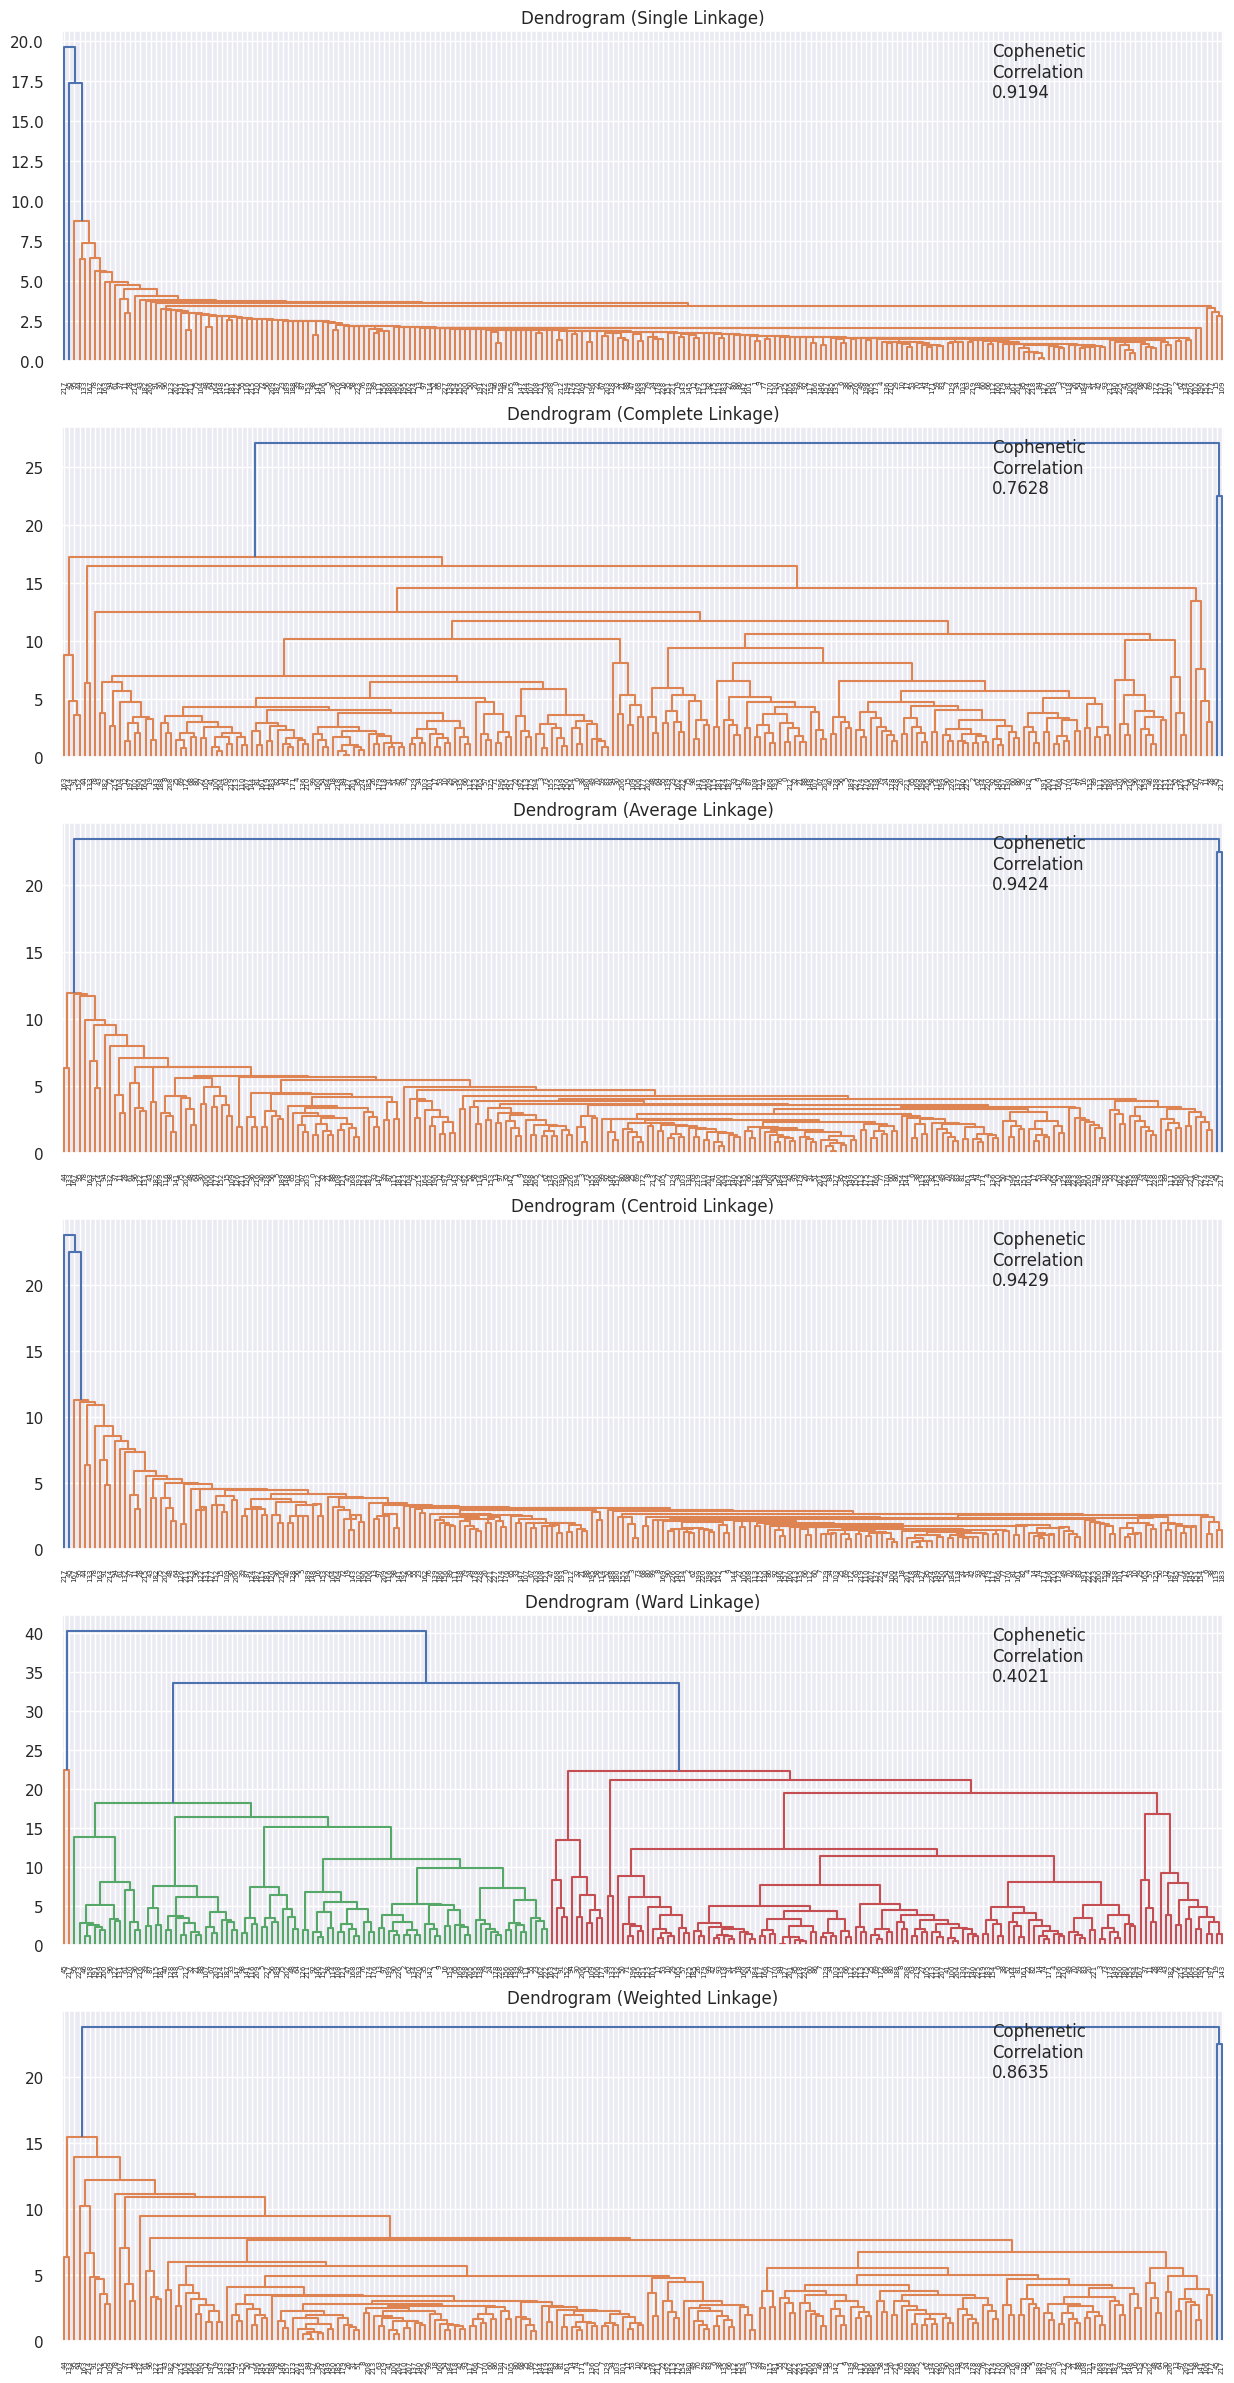

In [108]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df1_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df1_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.4f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Load your data and preprocess it if needed
# ...

# Select numerical features for clustering
numerical_features = [
    'Surface_area',
    'Population_in_thousands',
    'Population_density',
    'Sex_ratio',
    'GDP:_Gross_domestic_product',
    'Economy:_Agriculture',
    'Economy:_Industry',
    'Economy:_Services_and_other_activity',
    'International_trade:_Exports',
    'International_trade:_Imports',
    'International_trade:_Balance',
    'Fertility_rate,_total',
    'Infant_mortality_rate',
    'Health:_Total_expenditure',
    'Education:_Government_expenditure',
    'Mobile-cellular_subscriptions',
    'Individuals_using_the_Internet',
    'Threatened_species',
    'CO2_emission_estimates',
    'Energy_production,_primary'
]
df1_scaled = df1[numerical_features]

# Perform hierarchical clustering
linkage_matrix = linkage(df1_scaled, method='centroid')

# Determine the number of clusters
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assign cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Get mean and count of variables under different clusters
cluster_profile = df.groupby('Cluster').agg(['mean', 'count'])

# Print the cluster profiles
cluster_profile


<ipython-input-109-ec1822a615f1>:45: FutureWarning: ['country', 'Region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_profile = df.groupby('Cluster').agg(['mean', 'count'])


Surface_area       Population_in_thousands       Population_density  \
                 mean count                    mean count               mean   
Cluster                                                                        
1        5.060932e+05   227            2.540674e+04   227         466.085022   
2        9.600000e+06     1            1.409517e+06     1         150.100000   
3        9.833517e+06     1            3.244600e+05     1          35.500000   

                Sex_ratio       GDP:_Gross_domestic_product        \
        count        mean count                        mean count   
Cluster                                                             
1         227  101.929515   227                1.978706e+05   227   
2           1  106.300000     1                1.115846e+07     1   
3           1   98.000000     1                1.803665e+07     1   

        Economy:_Agriculture       Economy:_Industry        \
                        mean count              mean count   
Cluster                                                      
1                  11.146256   227         27.437225   227   
2                   9.200000     1         41.100000     1   
3                   1.000000     1         19.700000     1   

        Economy:_Services_and_other_activity        \
                                        mean count   
Cluster                                              
1                                  61.078855   227   
2                                  49.700000     1   
3                                  79.300000     1   

        International_trade:_Exports       International_trade:_Imports        \
                                mean count                         mean count   
Cluster                                                                         
1                       5.308750e+04   227                 5.279153e+04   227   
2                       2.118981e+06     1                 1.588696e+06     1   
3                       1.453167e+06     1                 2.249661e+06     1   

        International_trade:_Balance       Fertility_rate,_total        \
                                mean count                  mean count   
Cluster                                                                  
1                         457.718062   227              2.788987   227   
2                      530285.000000     1              1.600000     1   
3                     -796494.000000     1              1.900000     1   

        Infant_mortality_rate       Health:_Total_expenditure        \
                         mean count                      mean count   
Cluster                                                               
1                   24.322687   227                  6.652203   227   
2                   11.600000     1                  5.500000     1   
3                    6.000000     1                 17.100000     1   

        Education:_Government_expenditure       Mobile-cellular_subscriptions  \
                                     mean count                          mean   
Cluster                                                                         
1                                4.559912   227                    107.451542   
2                                4.550000     1                     93.200000   
3                                5.400000     1                    117.600000   

              Individuals_using_the_Internet       Threatened_species        \
        count                           mean count               mean count   
Cluster                                                                       
1         227                     189.905286   227          32.403965   227   
2           1                    1080.000000     1          22.000000     1   
3           1                    1513.000000     1          33.900000     1   

        CO2_emission_estimates       Energy_production,_primary        
                      

In [110]:
df1.head()

country          Region  Surface_area  Population_in_thousands  \
0     Afghanistan    SouthernAsia      0.037238                 0.020854   
1         Albania  SouthernEurope     -0.313151                -0.224289   
2         Algeria  NorthernAfrica      1.007858                 0.064378   
3  American Samoa       Polynesia     -0.329179                -0.245901   
4         Andorra  SouthernEurope     -0.329028                -0.245743   

   Population_density  Sex_ratio  GDP:_Gross_domestic_product  \
0           -0.177549   0.206068                    -0.205670   
1           -0.154727  -0.001483                    -0.211588   
2           -0.193677   0.003234                    -0.107697   
3           -0.080260   0.078707                    -0.203229   
4           -0.129991   0.017385                    -0.217506   

   Economy:_Agriculture  Economy:_Industry  \
0              1.061700          -0.333522   
1              0.983420          -0.117215   
2              0.096245           0.788072   
3             -0.329946          -0.081163   
4             -0.921396          -1.334946   

   Economy:_Services_and_other_activity  International_trade:_Exports  \
0                             -0.529713                     -0.311091   
1                             -0.638251                     -0.308742   
2                             -0.719654                     -0.178136   
3                              0.012975                     -0.299745   
4                              1.864897                     -0.317418   

   International_trade:_Imports  International_trade:_Balance  \
0                     -0.301133                     -0.020041   
1                     -0.296073                     -0.028579   
2                     -0.101111                     -0.234417   
3                     -0.286238                     -0.003936   
4                     -0.311304                     -0.007812   

   Fertility_rate,_total  Infant_mortality_rate  Health:_Total_expenditure  \
0               1.877252               2.027993                   0.591834   
1              -0.804444              -0.437770                  -0.311306   
2               0.163946               0.160406                   0.199164   
3              -0.134020              -0.666081                  -0.134605   
4              -1.176901              -0.362427                   0.552567   

   Education:_Government_expenditure  Mobile-cellular_subscriptions  \
0                          -0.885404                      -1.116735   
1                          -0.745257                      -0.025184   
2                          -0.009486                       0.135625   
3                          -0.009486                       0.018673   
4                          -0.885404                      -0.471063   

   Individuals_using_the_Internet  Threatened_species  CO2_emission_estimates  \
0                       -0.533729           -1.272815               -0.245034   
1                       -0.235651           -0.175164               -0.242909   
2                       -0.218714           -1.327487                0.345398   
3                       -0.364366            2.335554               -0.236941   
4                       -0.631959            0.068758               -0.251305   

   Energy_production,_primary  
0                   -0.712976  
1                   -0.444736  
2                   -0.280331  
3                   -0.314943  
4                    0.273454

In [111]:
cross_tab = pd.crosstab(df['Region'], df['Cluster'])
cross_tab


Cluster             1  2  3
Region                     
Caribbean          25  0  0
CentralAmerica      8  0  0
CentralAsia         5  0  0
EasternAfrica      19  0  0
EasternAsia         6  1  0
EasternEurope      10  0  0
Melanesia           5  0  0
Micronesia          7  0  0
MiddleAfrica        9  0  0
NorthernAfrica      7  0  0
NorthernAmerica     4  0  1
NorthernEurope     13  0  0
Oceania             2  0  0
Polynesia           9  0  0
South-easternAsia  11  0  0
SouthAmerica       14  0  0
SouthernAfrica      5  0  0
SouthernAsia        9  0  0
SouthernEurope     16  0  0
WesternAfrica      16  0  0
WesternAsia        18  0  0
WesternEurope       9  0  0

## Dimensionality Reduction or PCA

In [112]:
df1_scaled

Surface_area  Population_in_thousands  Population_density  Sex_ratio  \
0        0.037238                 0.020854           -0.177549   0.206068   
1       -0.313151                -0.224289           -0.154727  -0.001483   
2        1.007858                 0.064378           -0.193677   0.003234   
3       -0.329179                -0.245901           -0.080260   0.078707   
4       -0.329028                -0.245743           -0.129991   0.017385   
..            ...                      ...                 ...        ...   
224     -0.329211                -0.246232           -0.164638  -0.402435   
225     -0.179954                -0.242163           -0.200285   0.385318   
226     -0.032881                -0.033890           -0.177941   0.007951   
227      0.093238                -0.117780           -0.191200  -0.161864   
228     -0.109913                -0.122021           -0.182636  -0.326962   

     GDP:_Gross_domestic_product  Economy:_Agriculture  Economy:_Industry  \
0                      -0.205670              1.061700          -0.333522   
1                      -0.211588              0.983420          -0.117215   
2                      -0.107697              0.096245           0.788072   
3                      -0.203229             -0.329946          -0.081163   
4                      -0.217506             -0.921396          -1.334946   
..                           ...                   ...                ...   
224                    -0.203229             -0.329946          -0.081163   
225                    -0.203229             -0.329946          -0.081163   
226                    -0.199285              0.313690           0.756027   
227                    -0.205002             -0.251666           0.387503   
228                    -0.209993              0.165828           0.243298   

     Economy:_Services_and_other_activity  International_trade:_Exports  \
0                               -0.529713                     -0.311091   
1                               -0.638251                     -0.308742   
2                               -0.719654                     -0.178136   
3                                0.012975                     -0.299745   
4                                1.864897                     -0.317418   
..                                    ...                           ...   
224                              0.012975                     -0.317880   
225                              0.012975                     -0.299745   
226                             -0.862110                     -0.315228   
227                             -0.109130                     -0.287574   
228                             -0.312638                     -0.304689   

     International_trade:_Imports  International_trade:_Balance  \
0                       -0.301133                     -0.020041   
1                       -0.296073                     -0.028579   
2                       -0.101111                     -0.234417   
3                       -0.286238                     -0.003936   
4                       -0.311304                     -0.007812   
..                            ...                           ...   
224                     -0.317287                      0.009407   
225                     -0.286238                     -0.003936   
226                     -0.285999                     -0.079838   
227                     -0.283329                     -0.003264   
228                     -0.293578                     -0.023888   

     Fertility_rate,_total  Infant_mortality_rate  Health:_Total_expenditure  \
0                 1.877252               2.027993                   0.591834   
1                -0.804444              -0.437770                  -0.311306   
2                 0.163946               0.160406                   0.199164   
3                -0.134020              -0.666081                  -0.134605   
4                -1.176901              -0.362427

In [113]:
# Calculate the covariance matrix
cov_matrix = np.cov(df1_scaled, rowvar=False)
cov_matrix

array([[ 1.00438596e+00,  4.56718233e-01, -5.81123350e-02,
        -4.64313202e-02,  5.52724711e-01, -5.22891432e-02,
         9.23512239e-02, -3.02987307e-02,  4.89443134e-01,
         4.92546318e-01, -3.12118724e-02, -4.76977816e-02,
        -3.10119826e-02,  9.52245874e-02,  1.12513644e-02,
         4.55591750e-02,  3.59022809e-01, -1.14079890e-02,
         7.83098707e-01,  1.30493138e-01],
       [ 4.56718233e-01,  1.00438596e+00, -2.51597480e-02,
         2.14953052e-03,  5.60527741e-01,  3.42686814e-02,
         7.71149773e-02, -8.66280627e-02,  6.08592823e-01,
         5.39516408e-01,  1.88502558e-01, -4.33058332e-02,
         3.31749082e-02, -4.58457894e-02, -3.97804677e-02,
        -5.52459497e-02,  4.21439321e-01, -5.08182206e-02,
         7.02180958e-01, -2.82298915e-02],
       [-5.81123350e-02, -2.51597480e-02,  1.00438596e+00,
        -1.98099814e-02, -2.29488738e-02, -6.77156874e-02,
        -1.60152672e-01,  2.39189711e-01,  1.64979372e-02,
         1.57026993e-02,  3.1

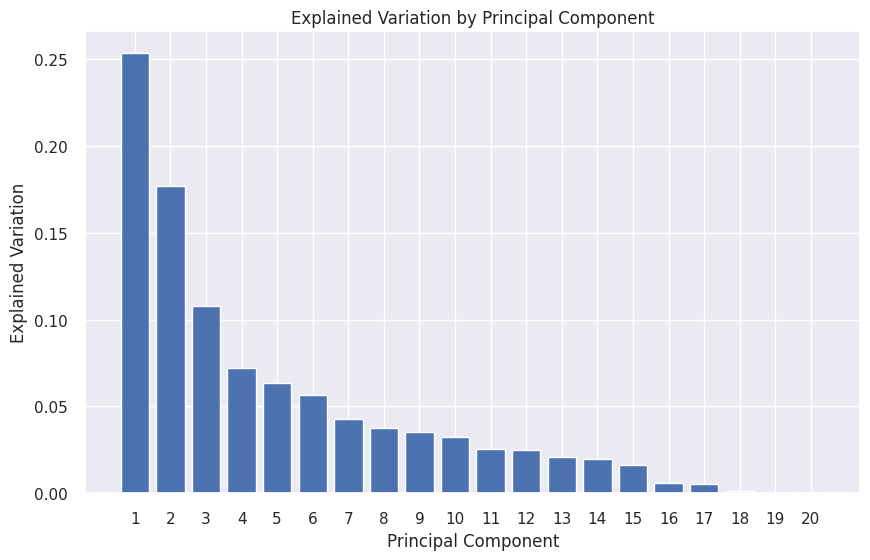

In [114]:
import matplotlib.pyplot as plt

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the explained variation
explained_variation = eigenvalues / np.sum(eigenvalues)

# Plot the explained variation as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variation) + 1), explained_variation, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variation')
plt.title('Explained Variation by Principal Component')
plt.xticks(range(1, len(explained_variation) + 1))
plt.grid(True)
plt.show()


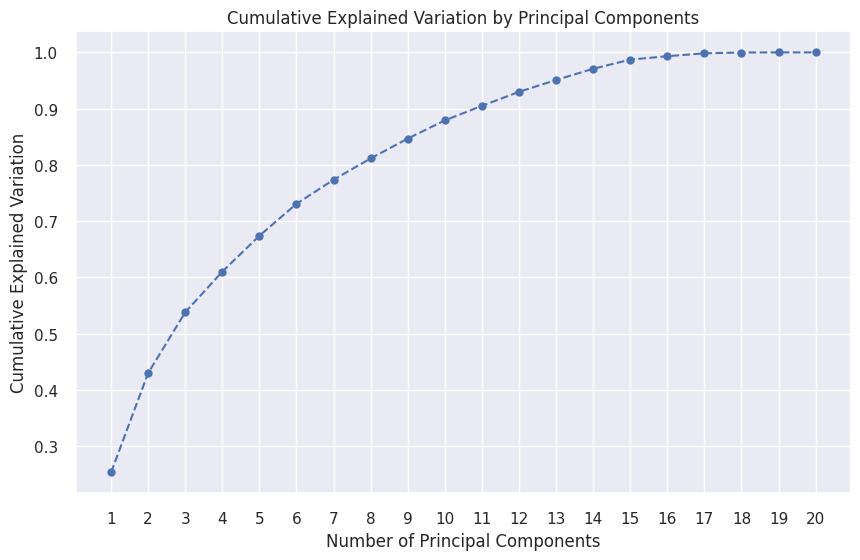

In [115]:
import matplotlib.pyplot as plt

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the explained variation
explained_variation = eigenvalues / np.sum(eigenvalues)

# Calculate the cumulative explained variation
cumulative_variation = np.cumsum(explained_variation)

# Plot the cumulative explained variation against eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variation) + 1), cumulative_variation, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variation')
plt.title('Cumulative Explained Variation by Principal Components')
plt.xticks(range(1, len(cumulative_variation) + 1))
plt.grid(True)
plt.show()


In [116]:
from sklearn.decomposition import PCA

# Create a PCA instance with the chosen number of components
num_components = 16
pca = PCA(n_components=num_components)

# Fit and transform the scaled data using PCA
pca_data = pca.fit_transform(df1_scaled)

# Create a new DataFrame with the PCA-transformed data
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i}' for i in range(1, num_components+1)])

# Print the first few rows of the PCA-transformed DataFrame
pca_df.head()


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.787699  2.435897 -0.661337  0.176573  1.497463 -1.015216 -0.226236   
1 -0.777524  0.035251  0.110375  0.450877 -0.017497  0.116417 -0.194072   
2  0.074531  0.750512  0.703703 -0.269497  0.589226 -0.382481 -1.251333   
3 -0.462058 -0.760521 -0.254252 -0.194134 -1.326946  1.098907  1.117183   
4  0.009705 -2.057592 -1.171579  0.604441  0.196013 -0.324267  0.298779   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.132374 -0.162288  0.408629  0.075830  0.377712 -0.662797 -0.577313   
1 -0.286581 -0.446940  0.218769  0.703042 -0.061356  0.206915  1.265883   
2 -0.242214  0.724543 -0.013840  0.206698  0.331055 -0.564527  0.372128   
3  0.674564 -0.116447  0.729033 -0.306050 -0.388888 -0.226251  0.410144   
4 -1.024897 -0.728525  1.124450 -0.545657  0.337952 -0.108730 -0.091702   

       PC15      PC16  
0  0.492950 -0.123757  
1 -0.514887 -0.044230  
2 -0.042885 -0.032187  
3  0.057147  0.335340  
4  0.348377 -0.417380

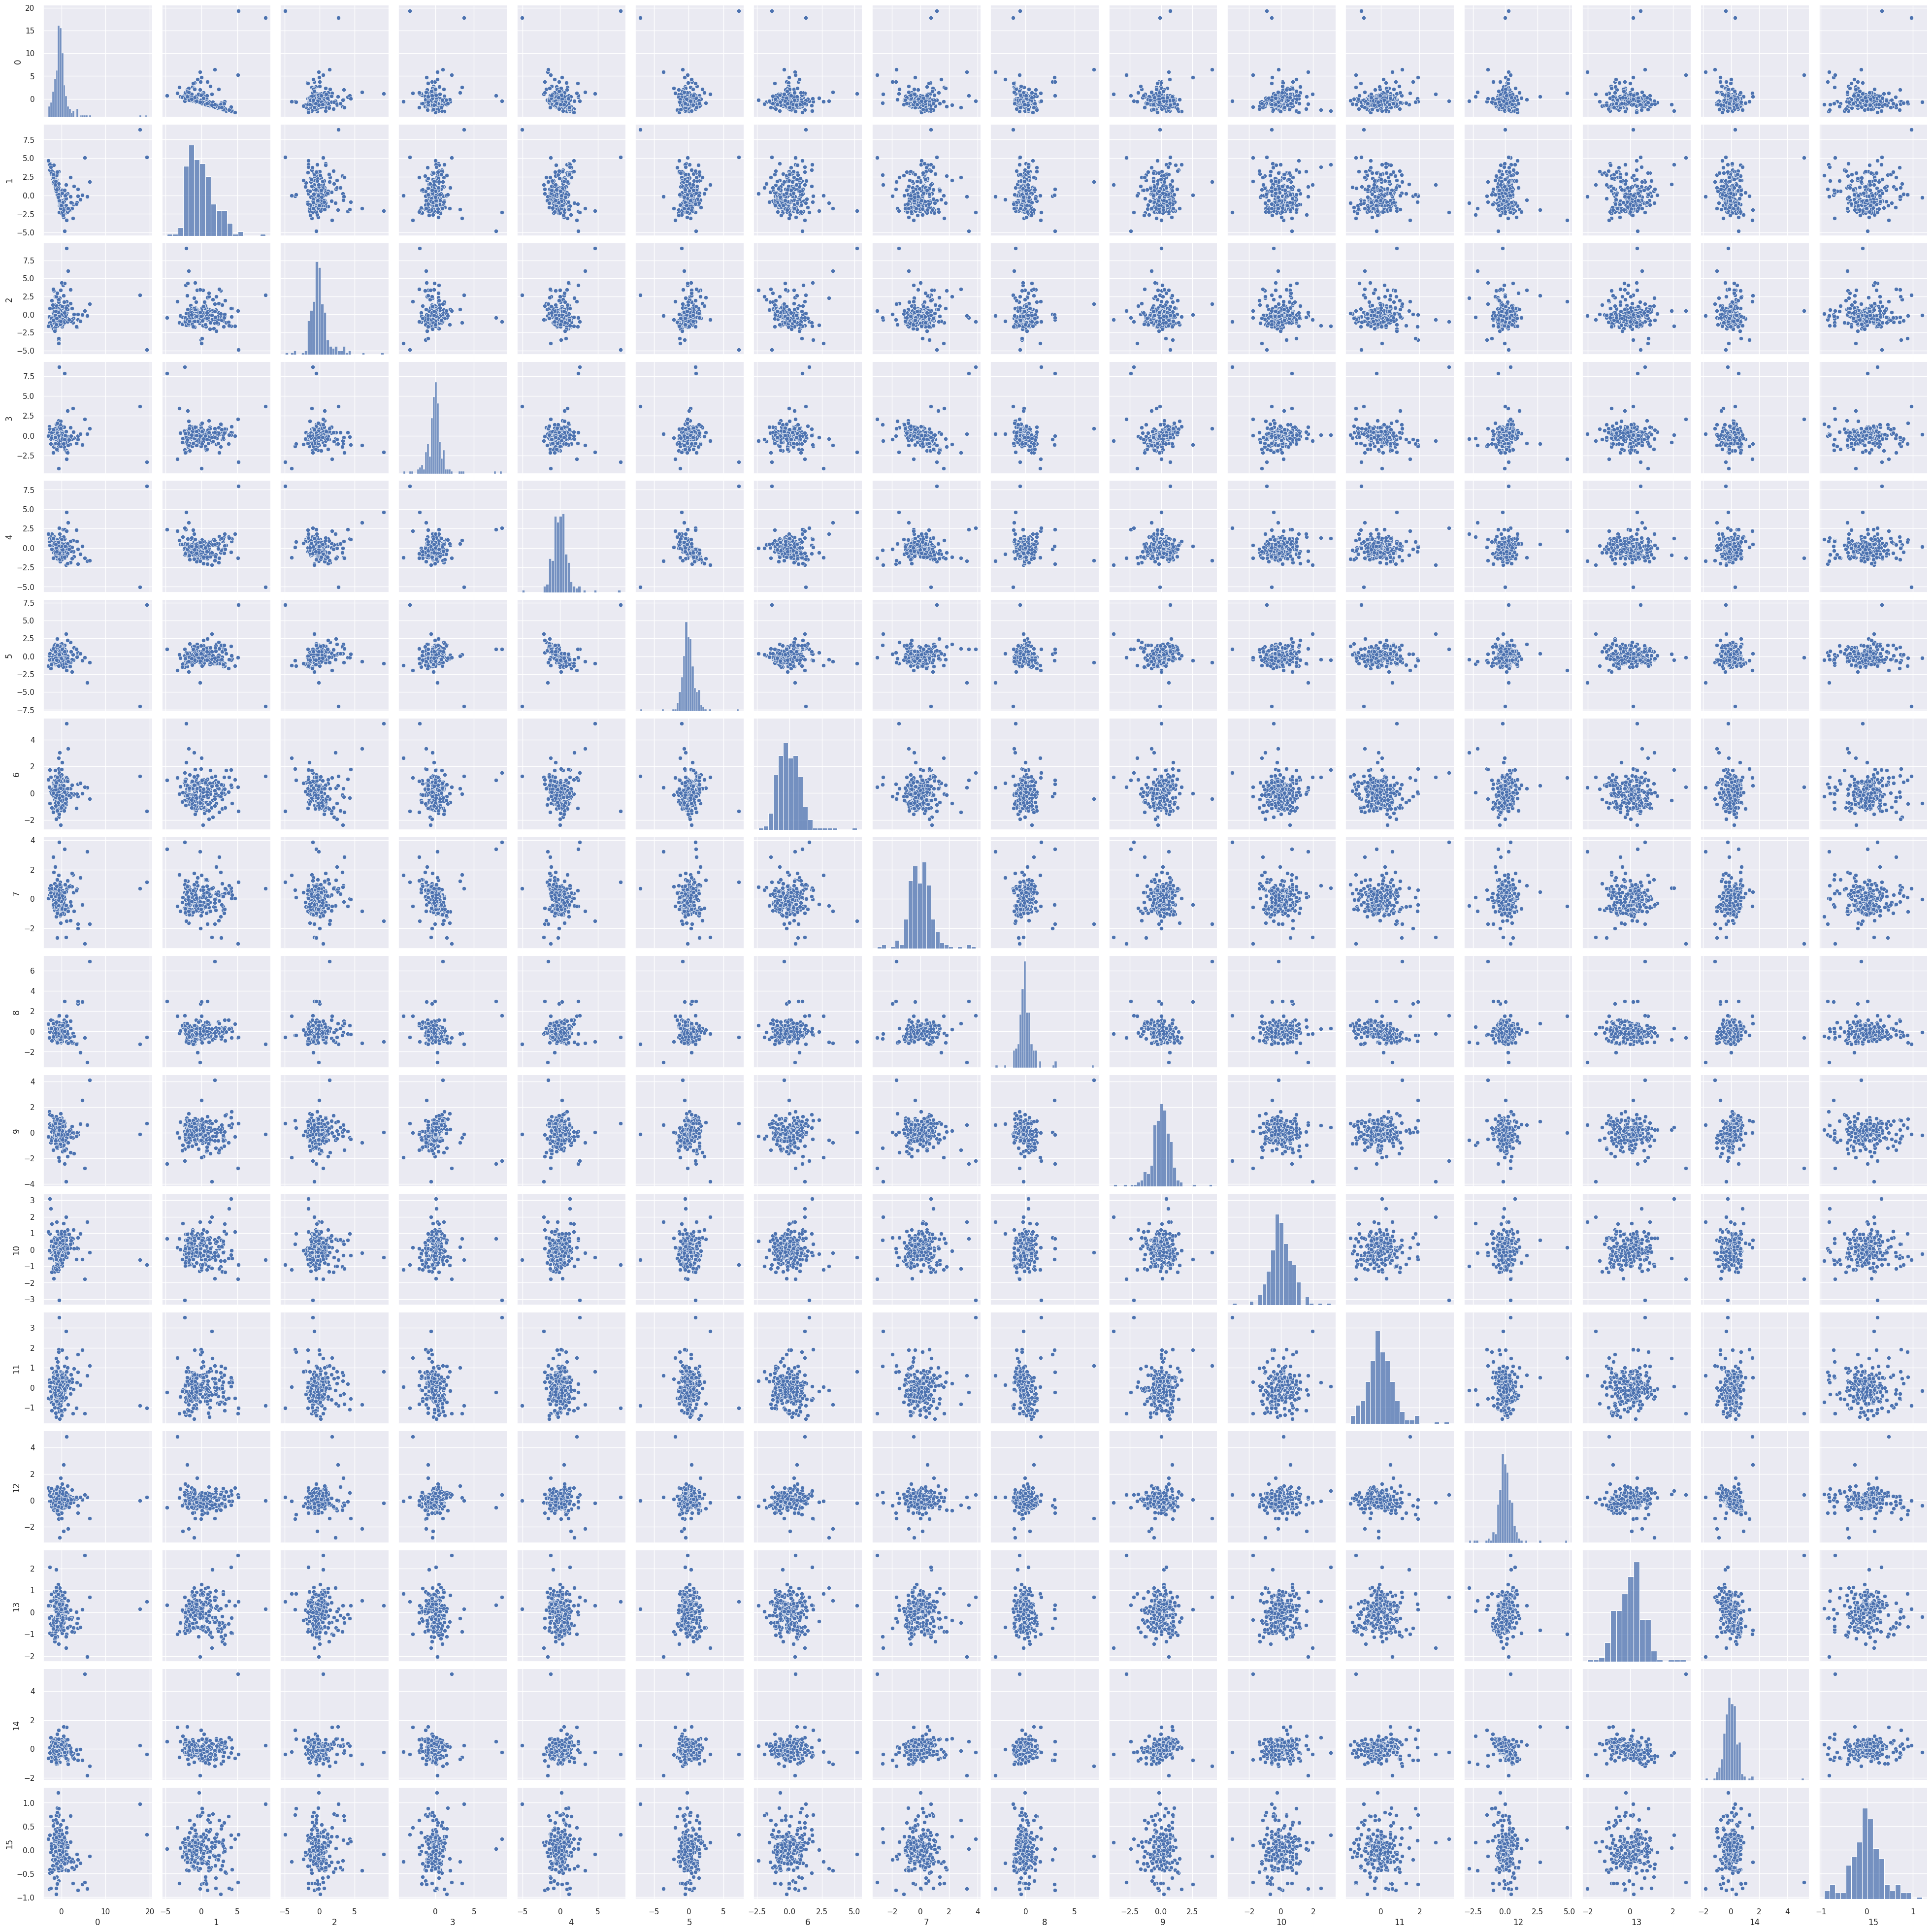

In [117]:
sns.pairplot(pd.DataFrame(pca_data))


### Fit to Linear Regression Model

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_data, df1['GDP:_Gross_domestic_product'], test_size=0.2, random_state=42)  # Replace 'target_column' with your actual target column name

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the scores
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared: 0.8783284238601407
Mean Squared Error: 0.16619439798193936
